## 01 Importes e leitura da base

In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import stumpy
from stumpy.floss import _cac
import os

In [ ]:
os.getcwd()
os.chdir('T1/dataset_fog_release/dataset')

In [10]:
allFiles = glob.glob(os.getcwd() + "/*.txt")
allFiles = np.sort(allFiles)

df = []
s = "Time of sample,Ankle_1,Ankle_2,Ankle_3,Thigh_1,Thigh_2,Thigh_3,Trunk_1,Trunk_2,Trunk_3,status"

for filename in allFiles:
        df.append(pd.read_csv(filename,sep = "\s+", header = None, names = s.split(",")))

In [11]:
# Retirando os pontos onde não está acontecendo os experimentos
for i in range(len(df)):
    df[i] = df[i][df[i].status != 0]

In [12]:
# Nós Temos ao total 17 arquivos, alguns pacientes fizeram mais de uma rodade de experimentos

len(allFiles)

17

In [13]:
for file_name in allFiles:
    name = file_name.split('/')
    print(name[-1])

S01R01.txt
S01R02.txt
S02R01.txt
S02R02.txt
S03R01.txt
S03R02.txt
S03R03.txt
S04R01.txt
S05R01.txt
S05R02.txt
S06R01.txt
S06R02.txt
S07R01.txt
S07R02.txt
S08R01.txt
S09R01.txt
S10R01.txt


## 02 Selecionando um paciente e analisando os seus dados 

In [ ]:
# Arquivo S08R01.txt -> Paciente 8
df[14]

Time of sample  Ankle_1  Ankle_2  Ankle_3  Thigh_1  Thigh_2  Thigh_3   
0                   15        0        0        0     -100        0     -969  \
1                   31        0        0        0     -100        0     -969   
2                   46        0        0        0     -100        9     -969   
3                   62        0        0        0     -100        9     -969   
4                   78        0        0        0     -109        9    -1000   
...                ...      ...      ...      ...      ...      ...      ...   
193298         3020296     -131      107     -960        0        0        0   
193299         3020312     -121      127     -970        0        0        0   
193300         3020328     -141      117     -960        0        0        0   
193301         3020343     -131      127     -980        0        0        0   
193302         3020359     -141        0        0        0        0        0   

        Trunk_1  Trunk_2  Trunk_3  status  
0             0        0        0       0  
1             0        0        0       0  
2             0        0        0       0  
3             0        0        0       0  
4             0        0        0       0  
...         ...      ...      ...     ...  
193298        0        0        0       0  
193299        0        0        0       0  
193300        0        0        0       0  
193301        0        0        0       0  
193302        0        0        0       0  

[193303 rows x 11 columns]

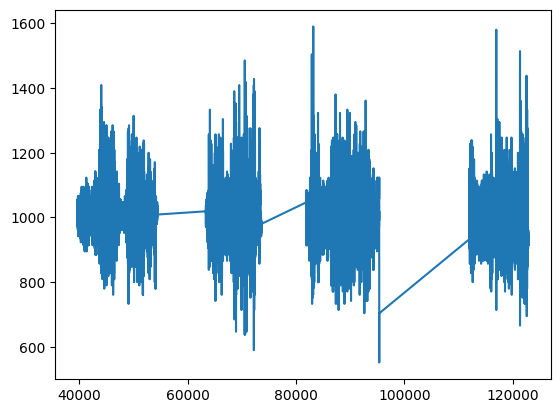

In [ ]:
# Fazendo o Plot de uma das suas séries temporais
# As regiões que são somente uma linha correspodendem aos dados retirados
plt.plot(df[14]["Trunk_2"])


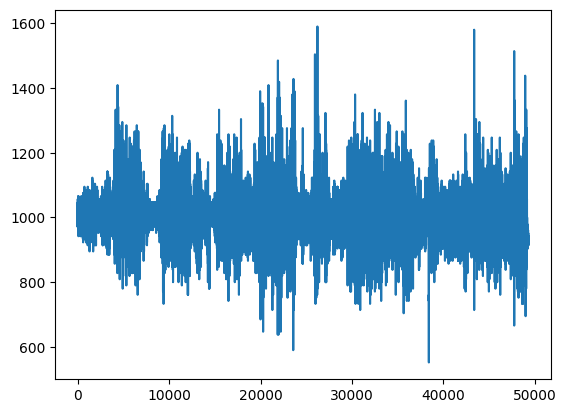

In [15]:
df_14 = df[14].reset_index(drop=True)

plt.plot(df_14.index, df_14["Trunk_2"])

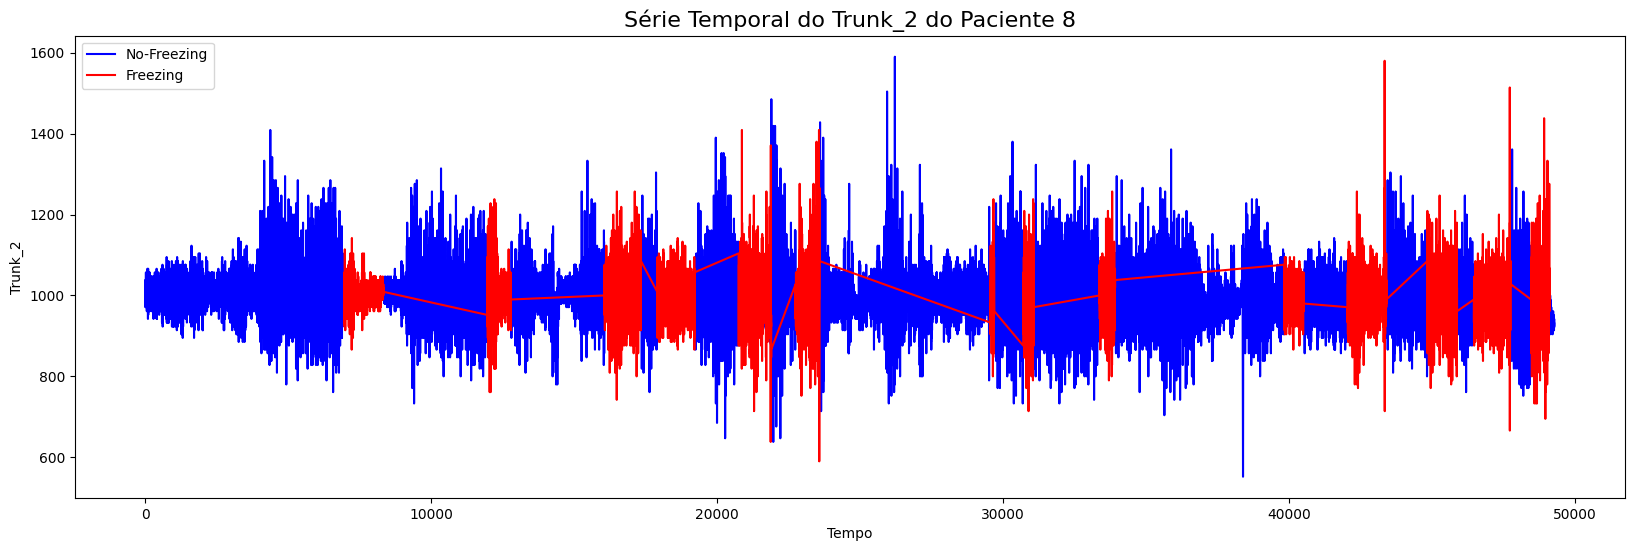

In [16]:
# Visualização dos labels, fog e não fog
df_label_1 = df_14[df_14['status'] == 1]
df_label_2 = df_14[df_14['status'] == 2]

plt.figure(figsize=(20, 6))

plt.plot(df_label_1.index, df_label_1["Trunk_2"], color='blue', label='No-Freezing')

plt.plot(df_label_2.index, df_label_2["Trunk_2"], color='red', label='Freezing')

plt.title("Série Temporal do Trunk_2 do Paciente 8", fontsize=16)
plt.xlabel("Tempo")
plt.ylabel("Trunk_2")
plt.legend()

plt.show()

- Para realizarmos os estudos da série, é fundamental que identifiquemos quais são os pontos de transição 

In [17]:
transitions = df_14['status'].diff()
transitions = transitions.reset_index()

transitions_values = transitions['status']
transitions_index = transitions['index']

In [ ]:
filtered_transitions = [transitions_index[i] for i in range(len(transitions)) if transitions_values[i] != 0.0 and transitions_values[i] != np.nan]
# Descartando o primeiro ponto que corresponde a origem 
filtered_transitions = filtered_transitions[1:]

In [19]:
# Primeiro ponto de transição

filtered_transitions[0]

6966

In [20]:
# Preparação de dataframes para cada região de transição 
# Usamos um intervalo de 1000 pontos, 500 antes e 500 depois
df_transitions_14 = []
for transition_value in filtered_transitions:
    df_aux_transitions = pd.DataFrame()
    df_aux_transitions = df_14.loc[transition_value-500:transition_value+500]

    df_transitions_14.append(df_aux_transitions)

In [21]:
# DF da primeira região

df_transitions_14[0]

Time of sample  Ankle_1  Ankle_2  Ankle_3  Thigh_1  Thigh_2  Thigh_3   
6466          721031      191     1009      326     -109      935      242  \
6467          721046      444     1098      346      -81      925      171   
6468          721062      565     1088      435     -154      953      171   
6469          721078      727     1049      396     -218      953       50   
6470          721093      686     1009      386     -200      842       90   
...              ...      ...      ...      ...      ...      ...      ...   
7462          736593      303      931      267      -90      944      202   
7463          736609      303      941      247      -90      953      202   
7464          736625      303      950      267      -45      944      232   
7465          736640      303      950      267      -90      953      232   
7466          736656      282      960      277     -136      953      272   

      Trunk_1  Trunk_2  Trunk_3  status  
6466       58      961     -135       1  
6467      135      876     -174       1  
6468      145      876     -165       1  
6469      165      866     -194       1  
6470      116      876     -165       1  
...       ...      ...      ...     ...  
7462       97      990     -106       2  
7463      116      990     -145       2  
7464      116     1009     -155       2  
7465      106     1000     -135       2  
7466      126     1019     -155       2  

[1001 rows x 11 columns]

In [23]:
# Visualizando a primeira região 


df_14_t1 = df_transitions_14[0].copy()
df_14_t1.reset_index(inplace=True, drop = True)

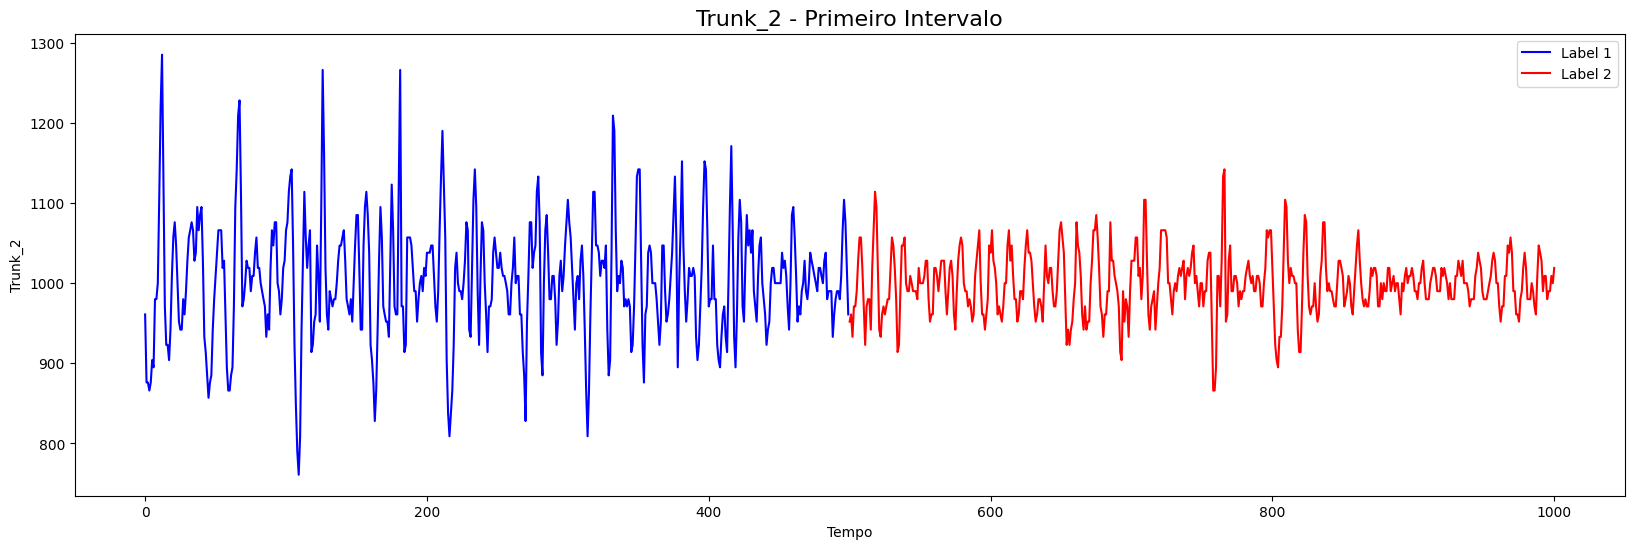

In [24]:

df_label_1_teste = df_14_t1[df_14_t1['status'] == 1]
df_label_2_teste = df_14_t1[df_14_t1['status'] == 2]


plt.figure(figsize=(20, 6))

plt.plot(df_label_1_teste.index, df_label_1_teste["Trunk_2"], color='blue', label='Label 1')

plt.plot(df_label_2_teste.index, df_label_2_teste["Trunk_2"], color='red', label='Label 2')

# Adiciona título e legenda
plt.title("Trunk_2 - Primeiro Intervalo", fontsize=16)
plt.xlabel("Tempo")
plt.ylabel("Trunk_2")
plt.legend()

plt.show()

### Análise do FLUSS

In [25]:
m = 50
df_mp = df_14_t1["Trunk_2"].astype(np.float64)
mp = stumpy.stump(df_mp, m=m)

In [26]:
L = 50
n_regimes = 2
cac, regime_locations = stumpy.fluss(mp[:, 1], L=L, n_regimes=n_regimes, excl_factor=1)

In [27]:
# Qual é a diferença entre o pronto predito de transição e o real?

print(f'A diferença entre o ponto de transição e o identificado é de: {500 - regime_locations[0]}')

A diferença entre o ponto de transição e o identificado é de: 66


<Figure size 3000x600 with 0 Axes>

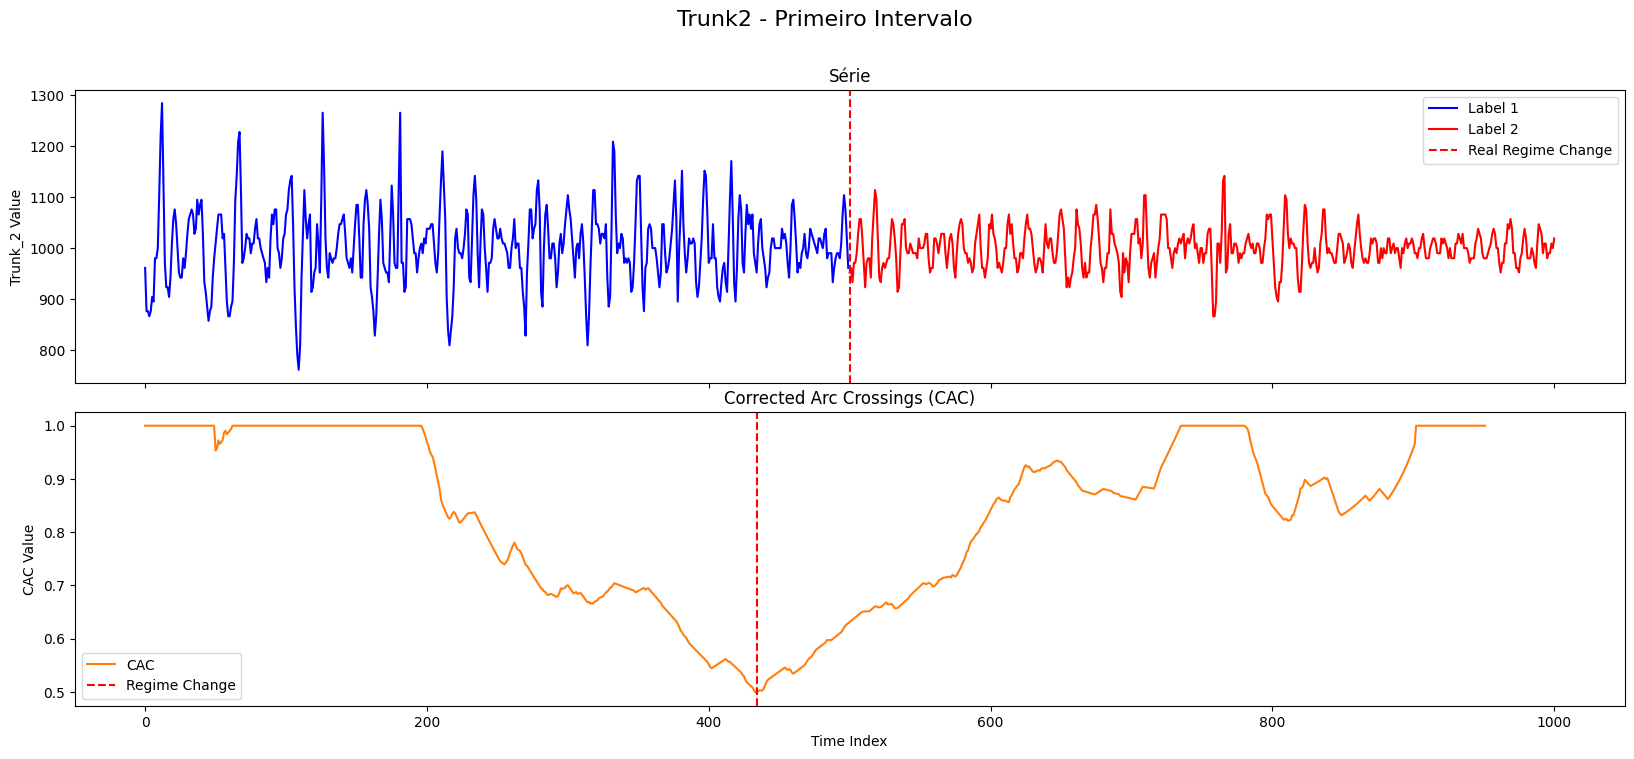

In [29]:
plt.figure(figsize=(30, 6))

# Criando os subplots
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0.1}, figsize=(20, 8))

# Primeiro subplot
df_transition_aux = df_14_t1.reset_index()

df_label_1_teste = df_transition_aux[df_transition_aux['status'] == 1]
df_label_2_teste = df_transition_aux[df_transition_aux['status'] == 2]

# Plota os dados nos eixos correspondentes
axs[0].plot(df_label_1_teste.index, df_label_1_teste["Trunk_2"], color='blue', label='Label 1')
axs[0].plot(df_label_2_teste.index, df_label_2_teste["Trunk_2"], color='red', label='Label 2')
axs[0].axvline(x=500, linestyle="dashed", color="red", label="Real Regime Change")
axs[0].set_ylabel("Trunk_2 Value")
axs[0].set_title(f"Série")
axs[0].legend()

axs[1].plot(range(cac.shape[0]), cac, color='C1', label='CAC')
for i in range(n_regimes-1):
    axs[1].axvline(x=regime_locations[i], linestyle="dashed", color="red", label="Regime Change")
axs[1].set_ylabel("CAC Value")
axs[1].set_title("Corrected Arc Crossings (CAC)")
axs[1].legend()

fig.suptitle("Trunk2 - Primeiro Intervalo", fontsize=16)
plt.xlabel("Time Index")

plt.show()

- Para análises mais completas, é necessário saber em qual parte da região ocorre a transição. Apesar dessa tarefa ser trivial para as regiões onde tem somente um ponto de transição, para aquelas onde há mais não é uma tarefa tão direta

In [32]:
n_regimes_14 = []
index_regimes_14 = []
for df_transition in df_transitions_14:

    transitions_aux = df_transition['status'].diff()
    transitions_aux = transitions_aux.reset_index()

    transitions_aux_values = transitions_aux['status']
    transitions_aux_index = transitions_aux.index.tolist()

    # transitions_aux = pd.DataFrame()

    # transitions_aux_index = list(df_transition.index.tolist())
    # transitions_aux_values = list(df_transition['status'].diff())

    filtered_transitions_aux = [transitions_aux_index[i] for i in range(len(transitions_aux_values)) if transitions_aux_values[i] != 0.0]
    filtered_transitions_aux = filtered_transitions_aux[1:]
    
    index_regimes_14.append(filtered_transitions_aux)
    n_regimes_14.append(len(filtered_transitions_aux)+1)

In [33]:
# Visualização dos pontos de transição 

index_regimes_14

[[500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500, 640],
 [360, 500],
 [500, 872],
 [128, 500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500],
 [500]]

In [35]:
# Há 28 regiões para serem analsiadas 
len(index_regimes_14), len(df_transitions_14)

(28, 28)

434


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


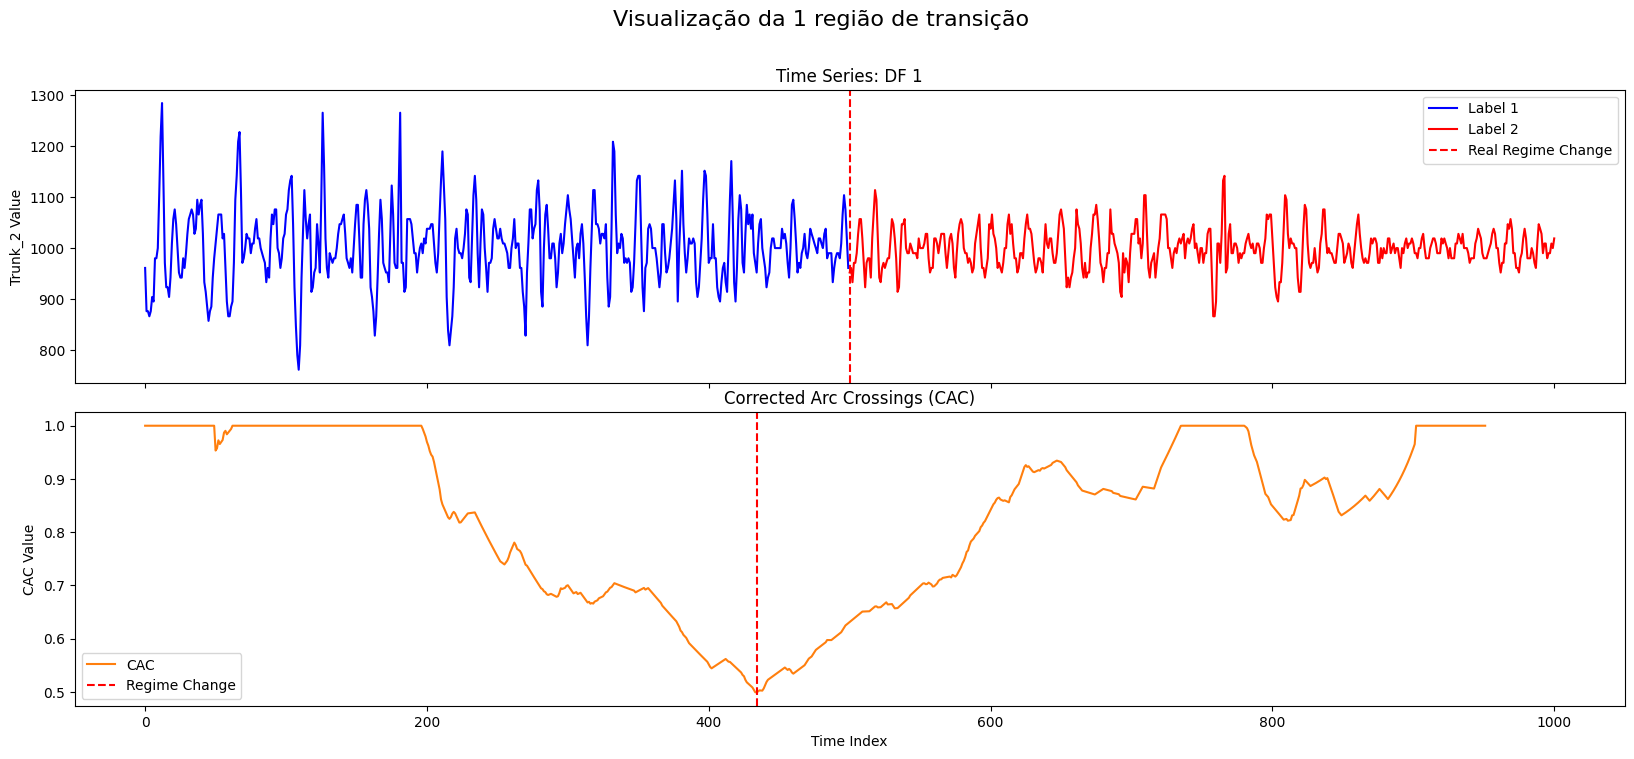

901


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


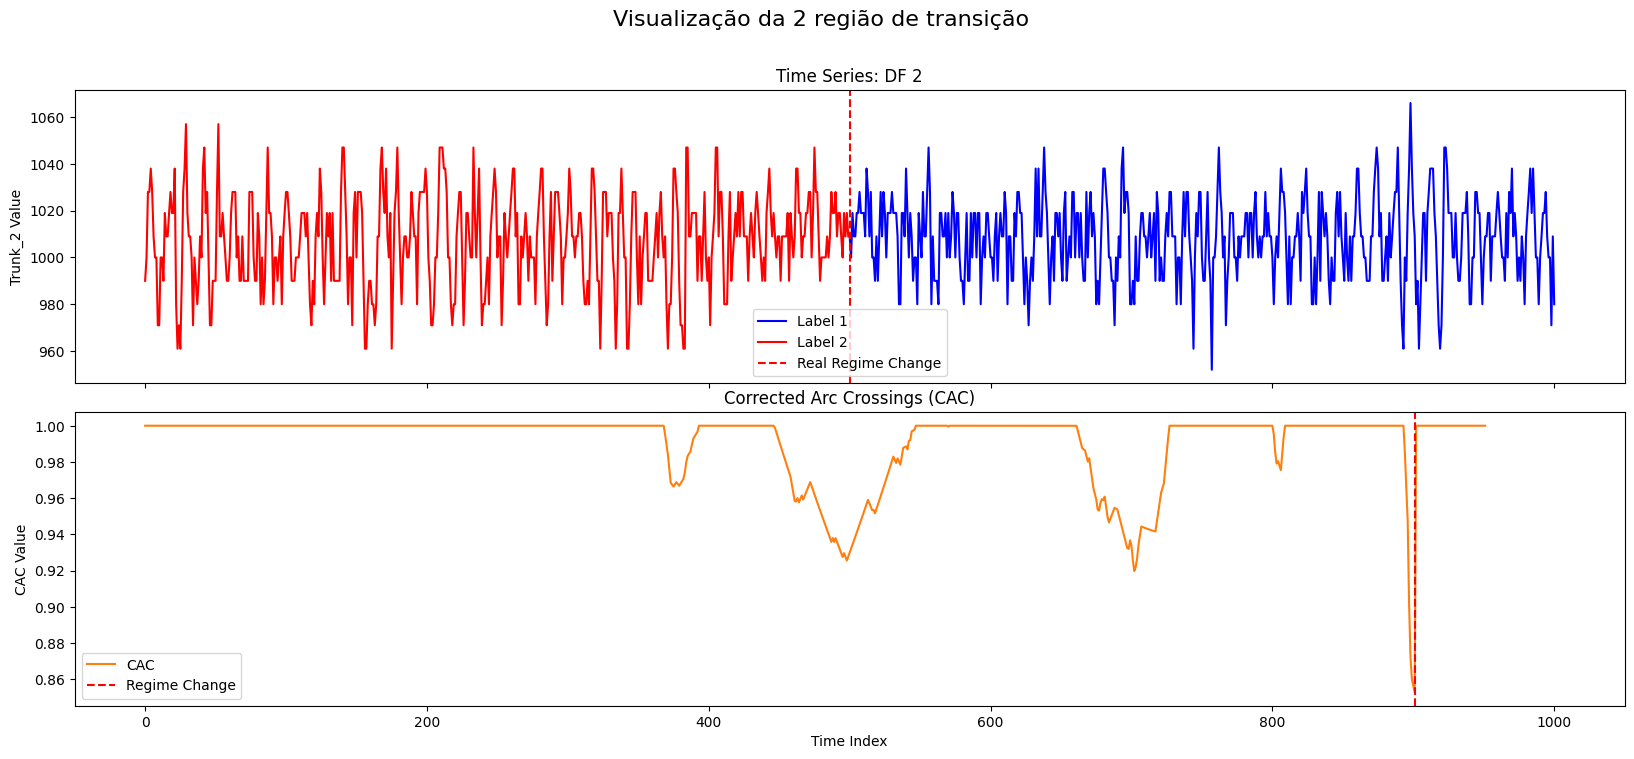

901


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


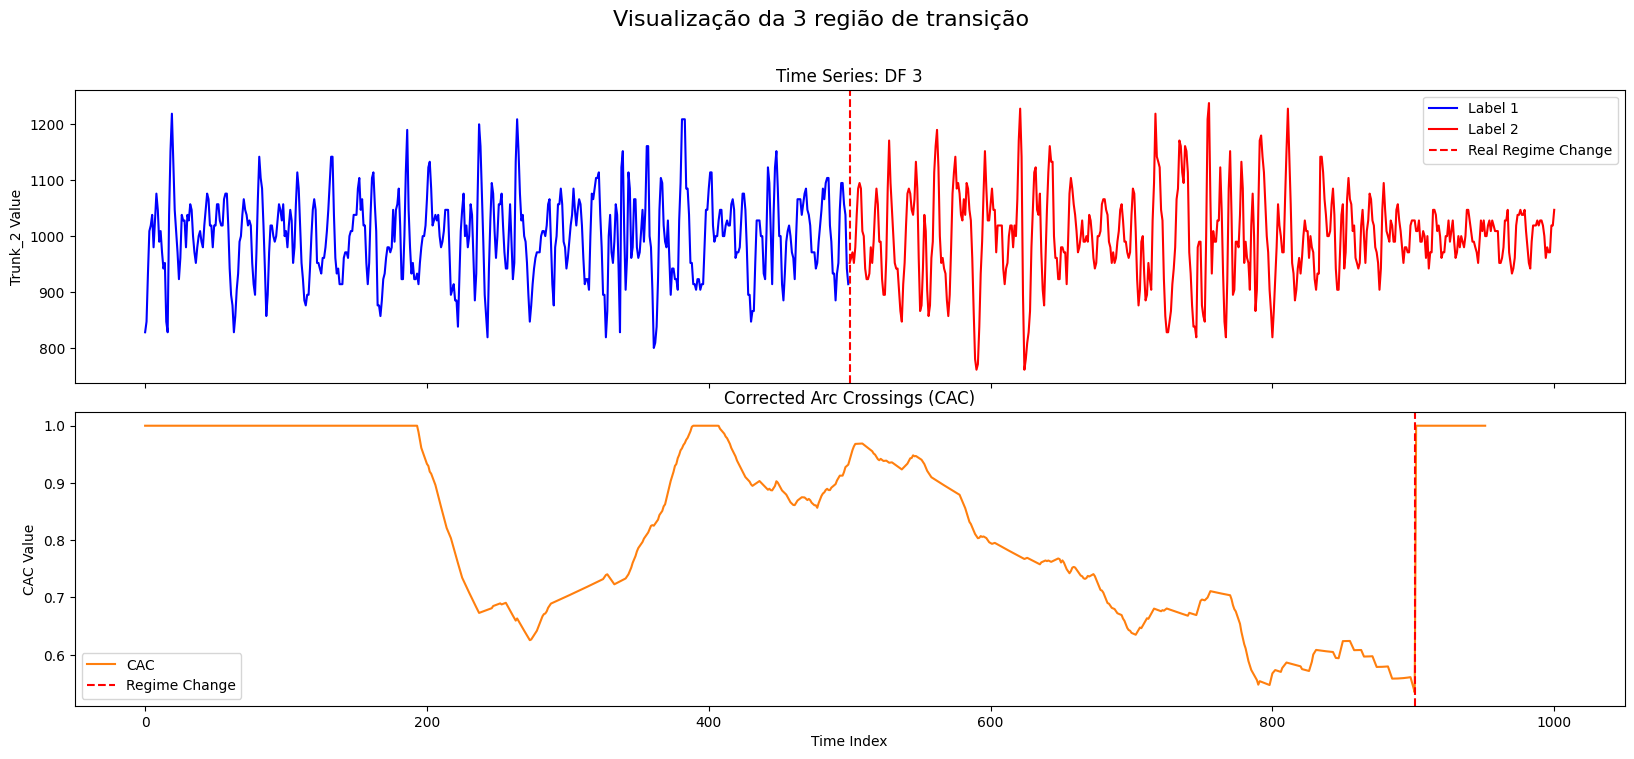

335


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


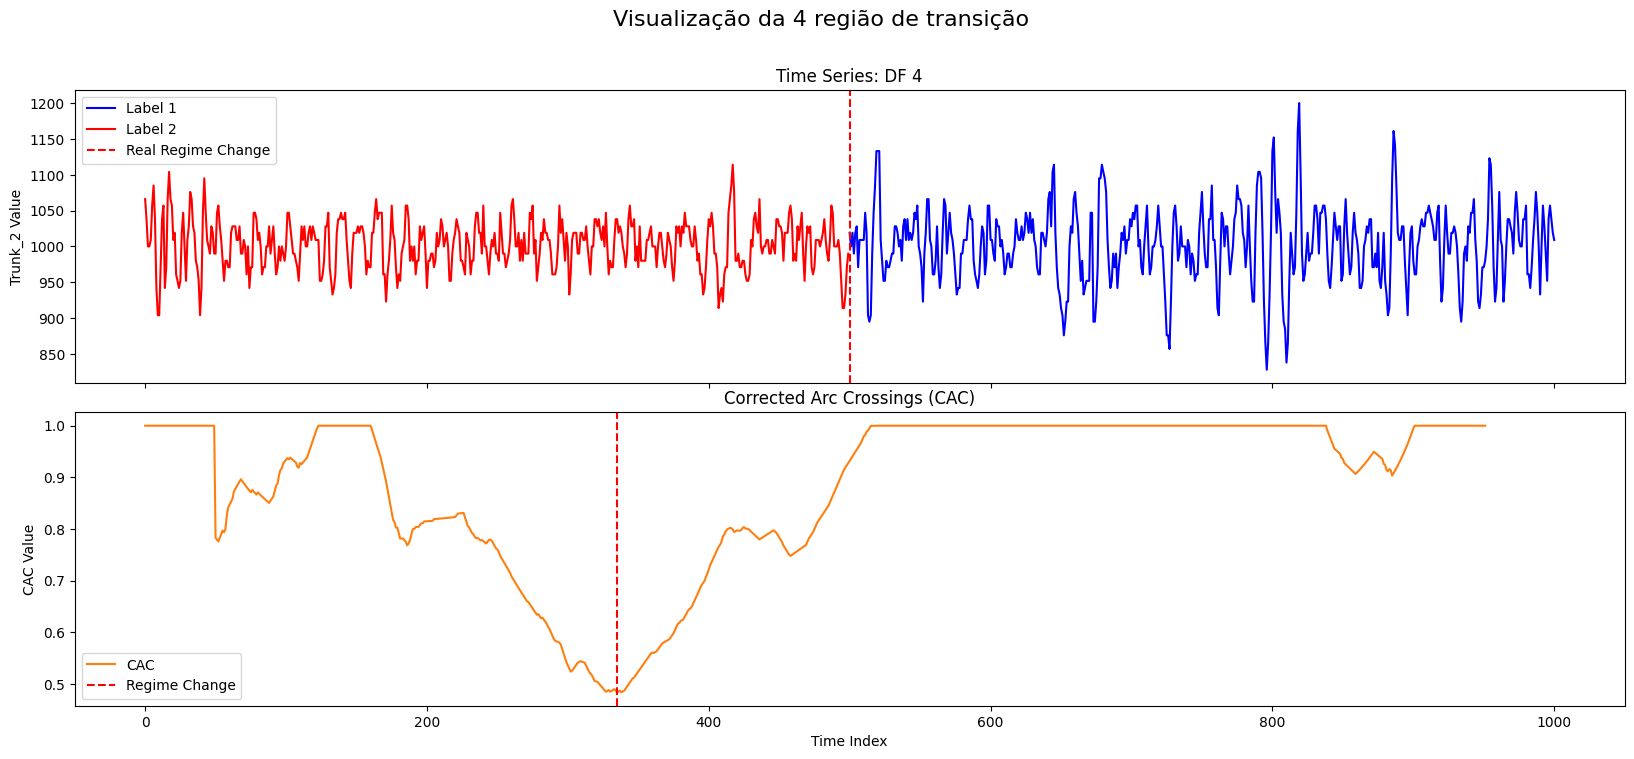

518


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


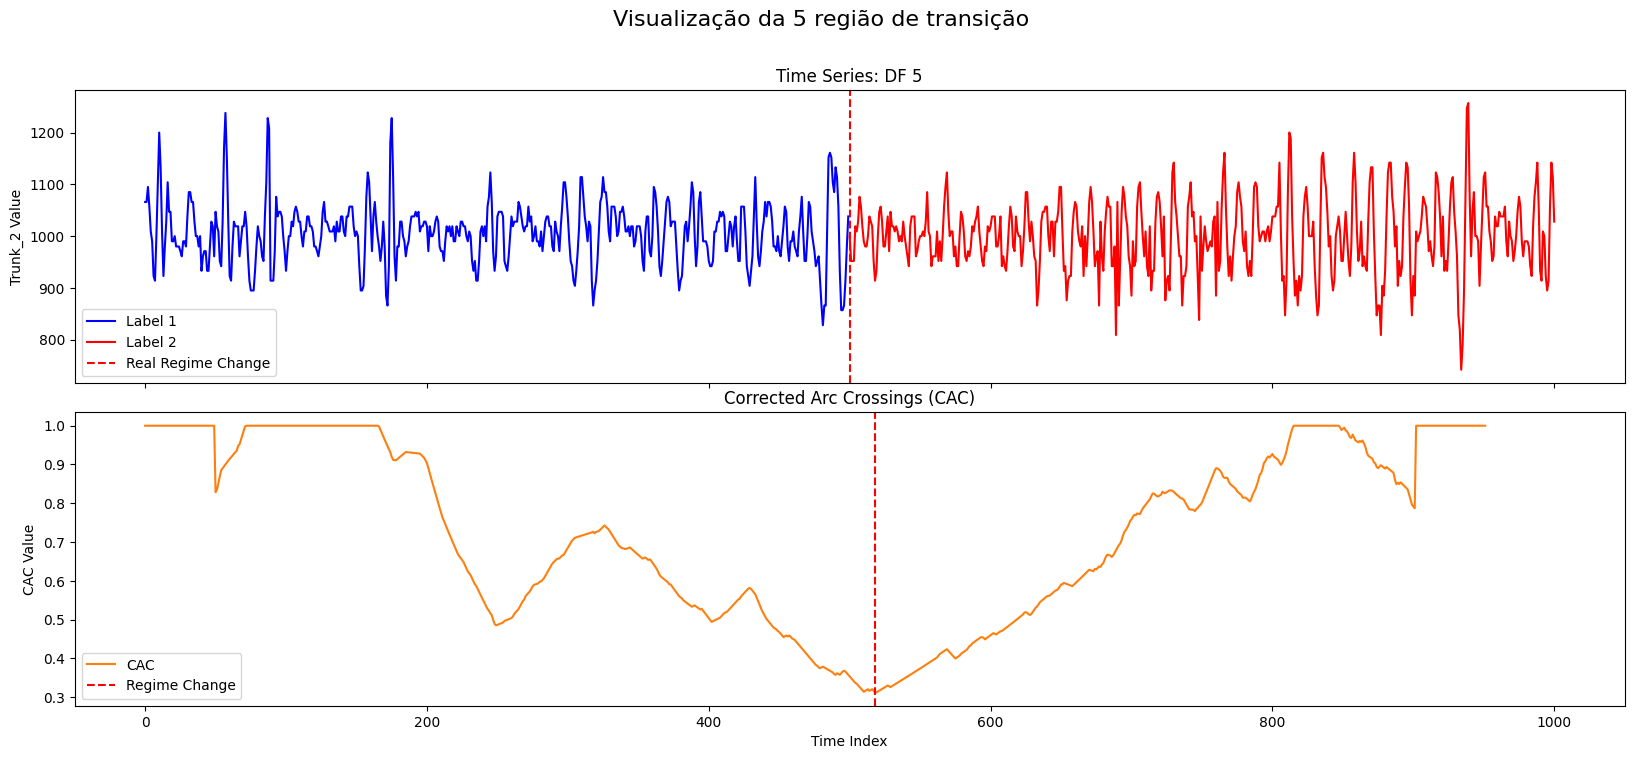

349


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


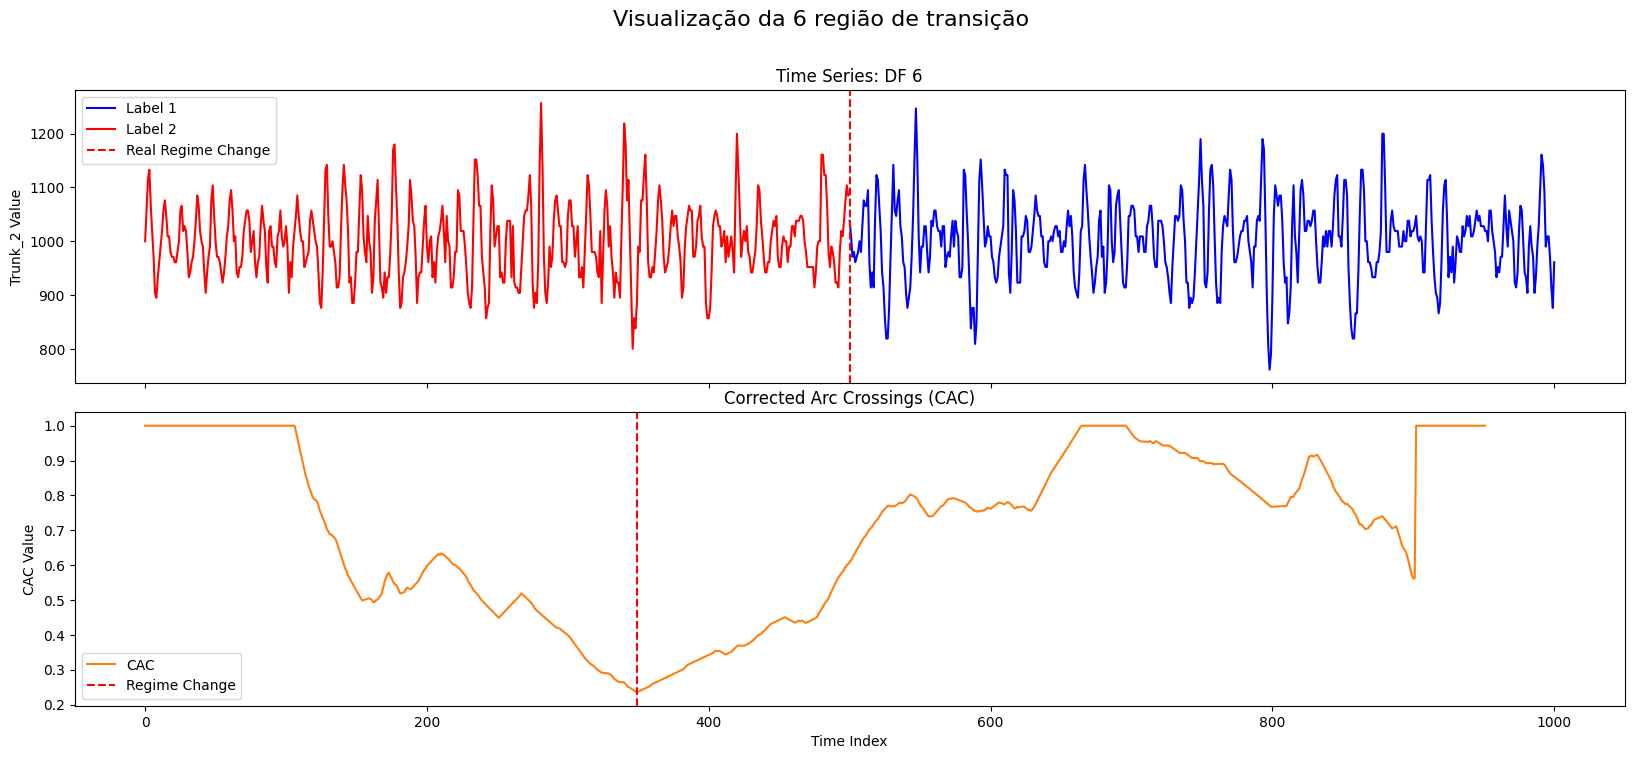

791


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


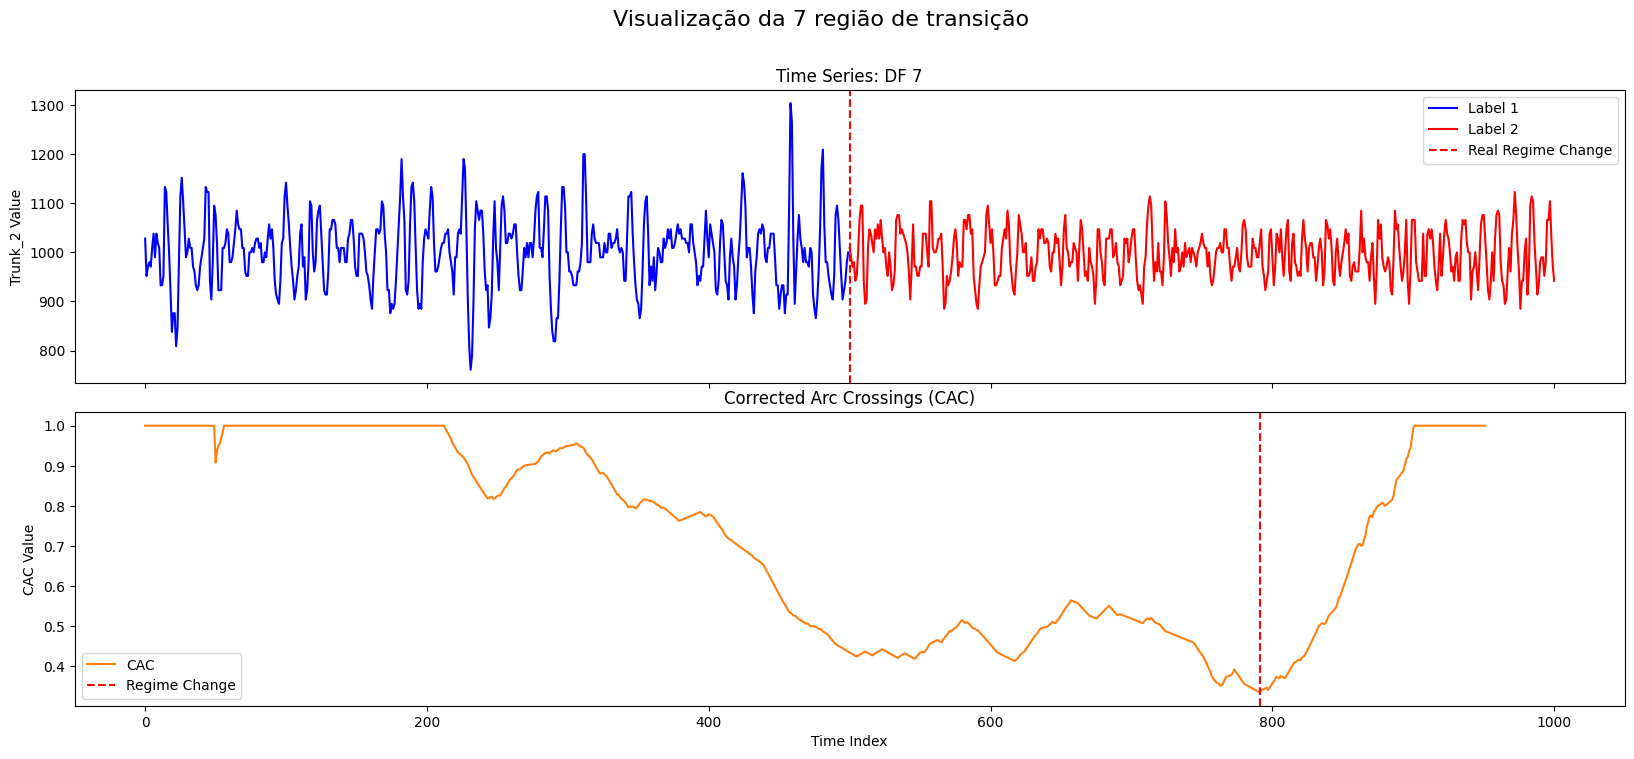

334


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


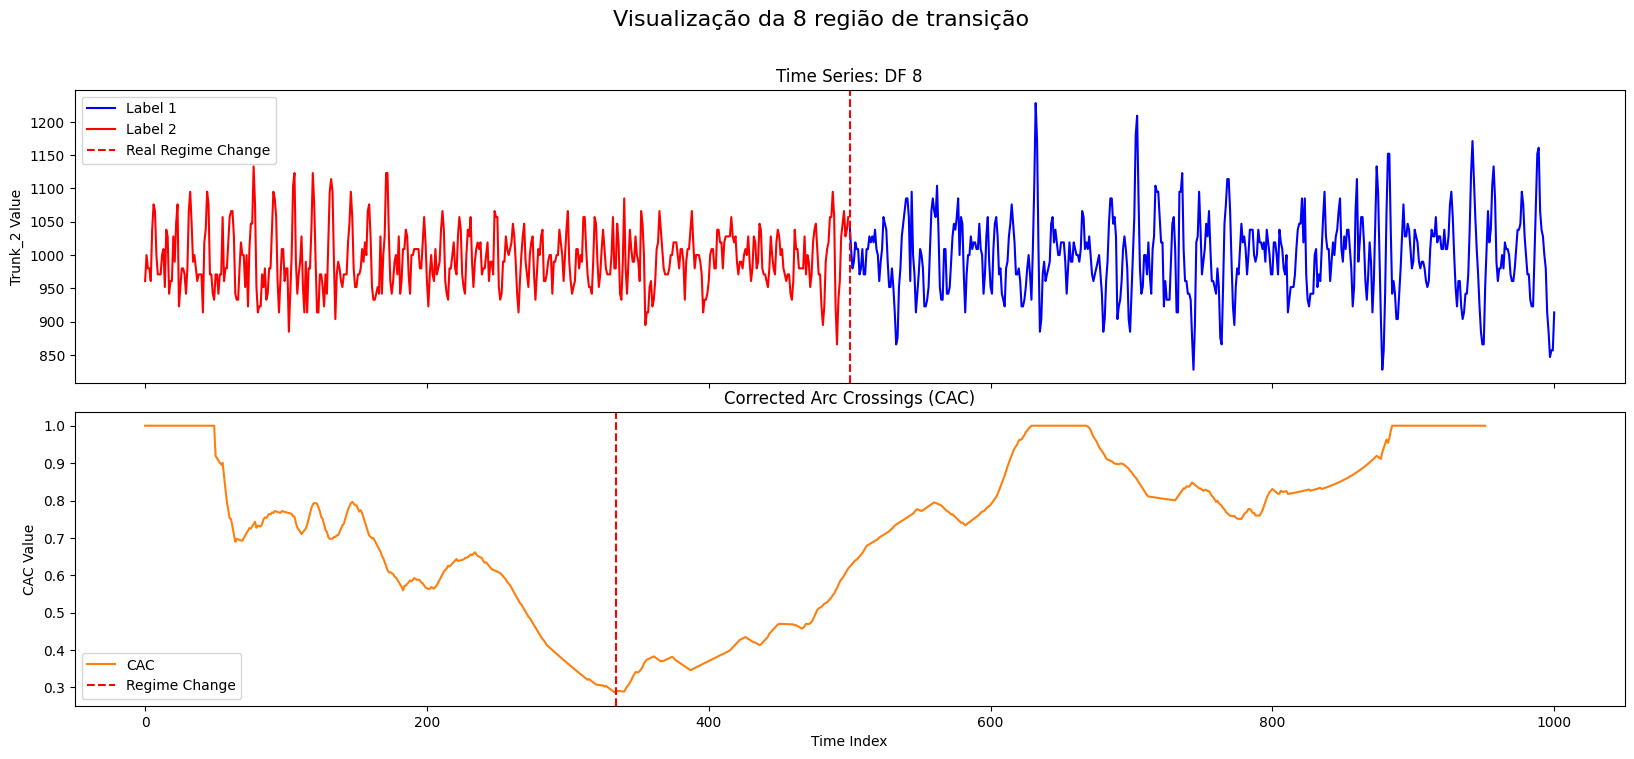

886


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


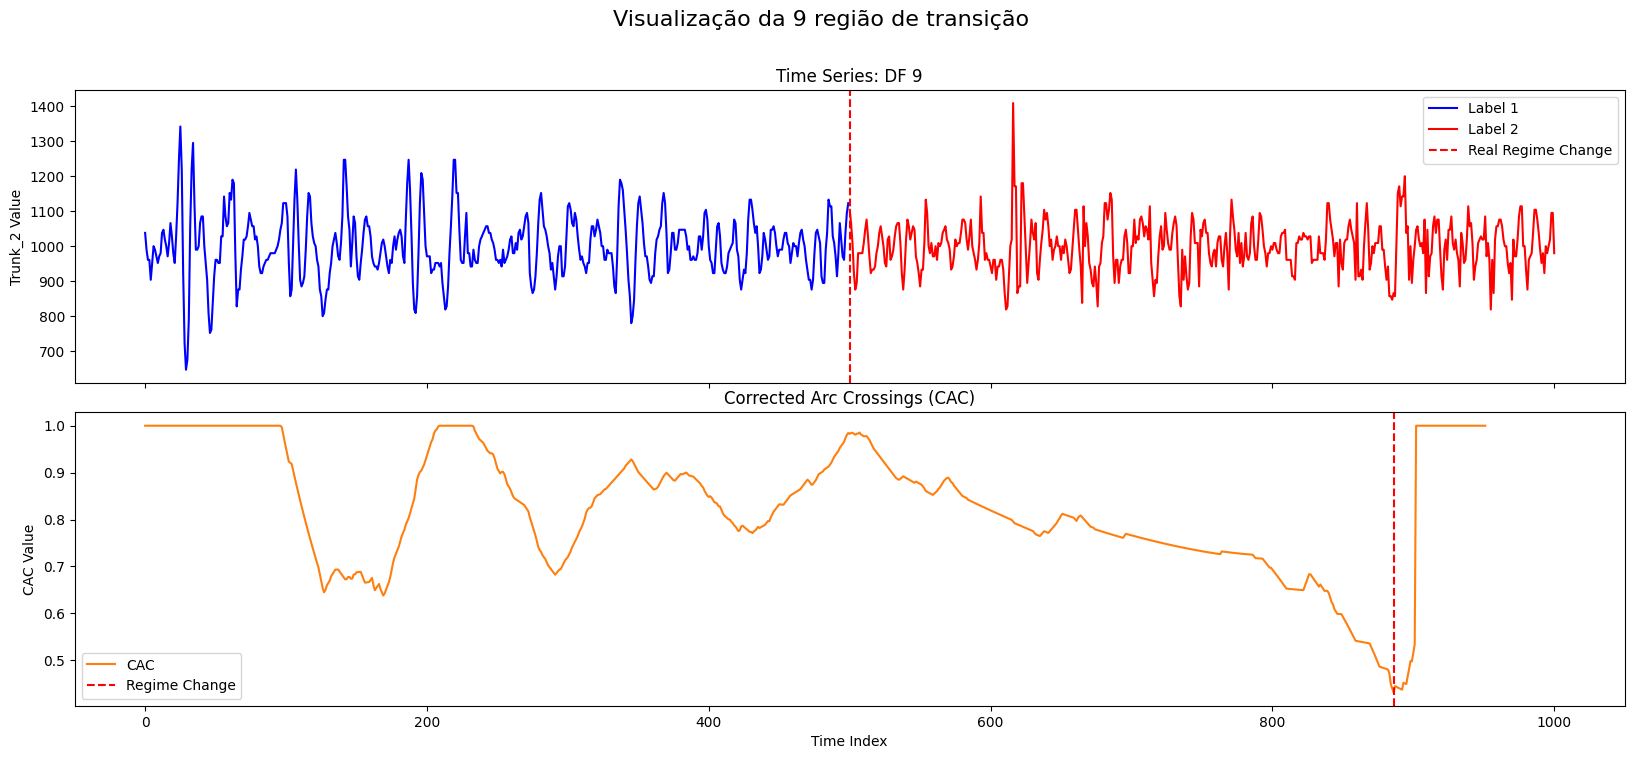

901


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


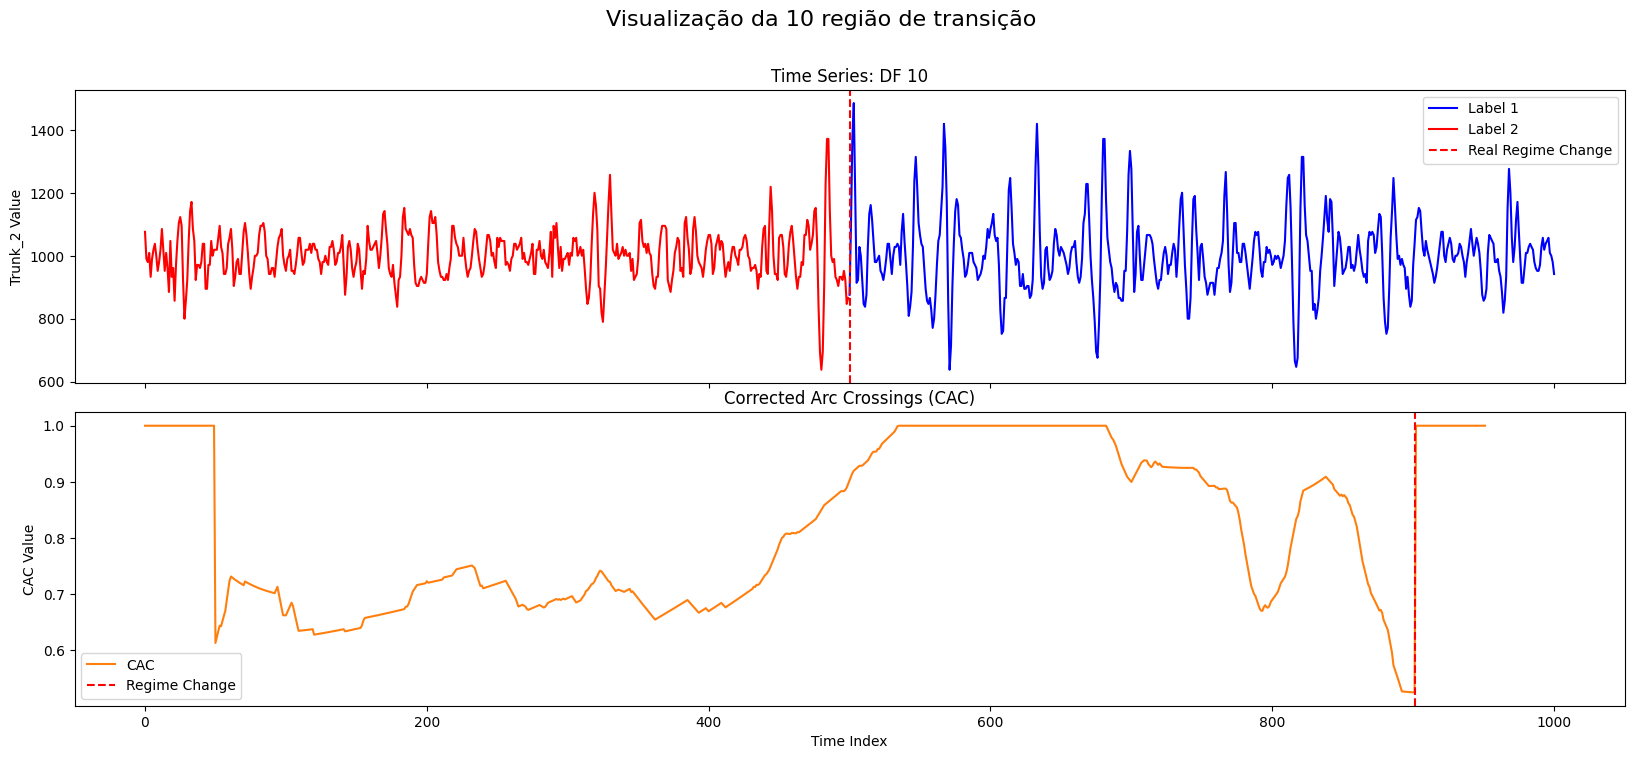

762


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


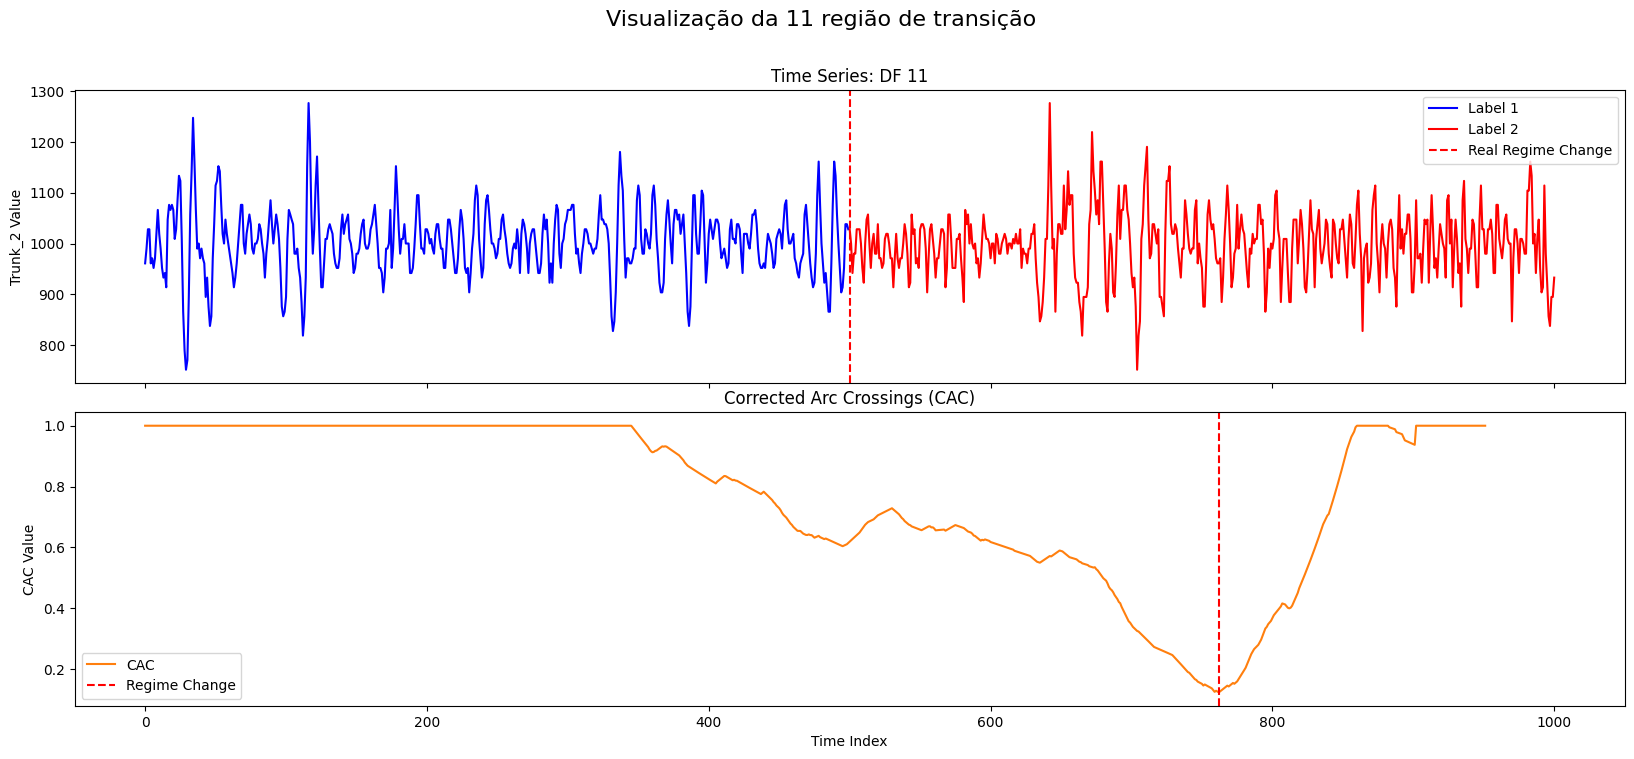

179


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


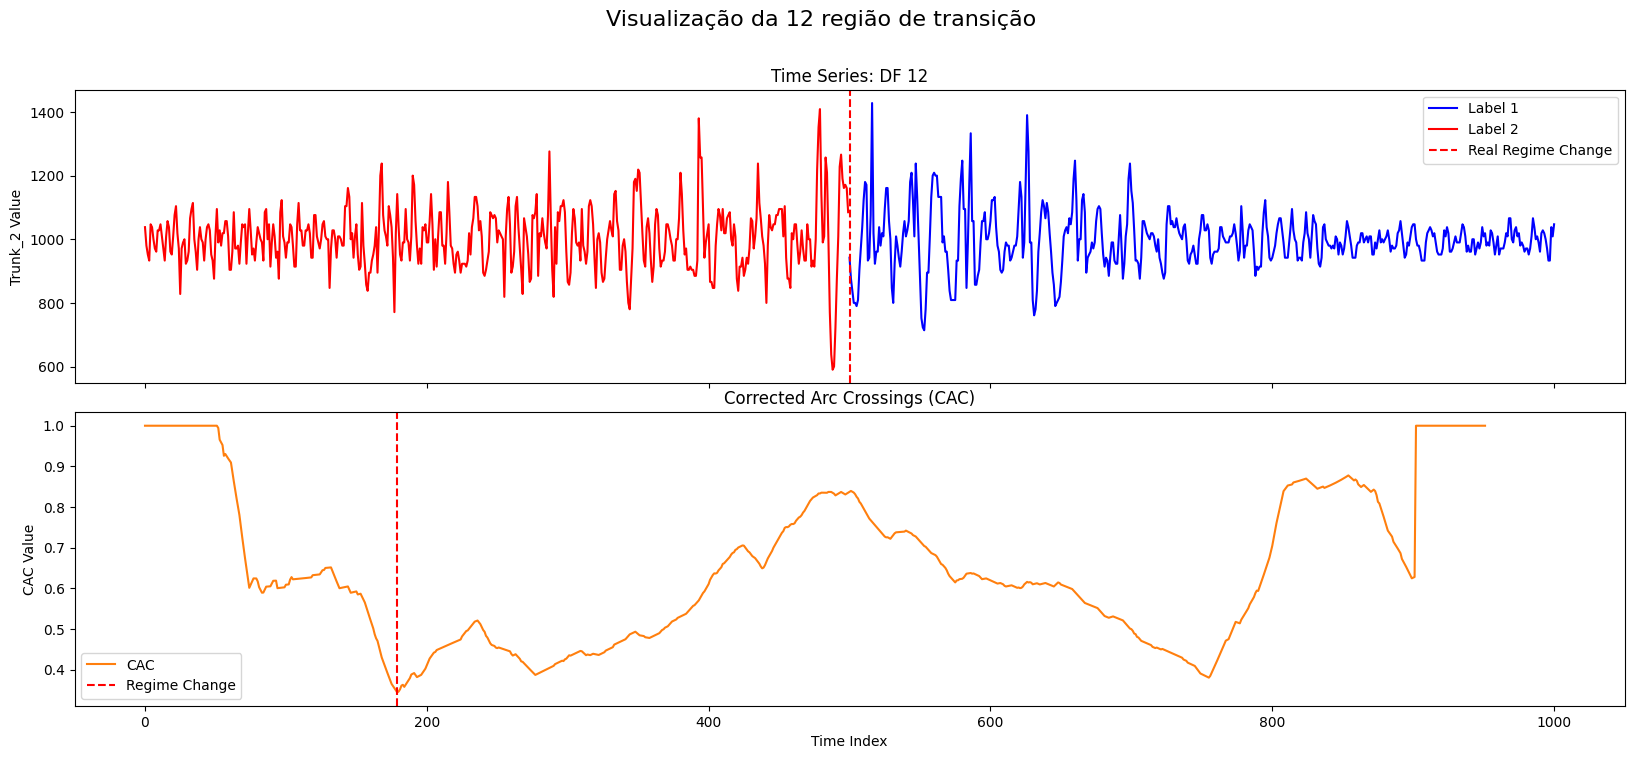

565


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


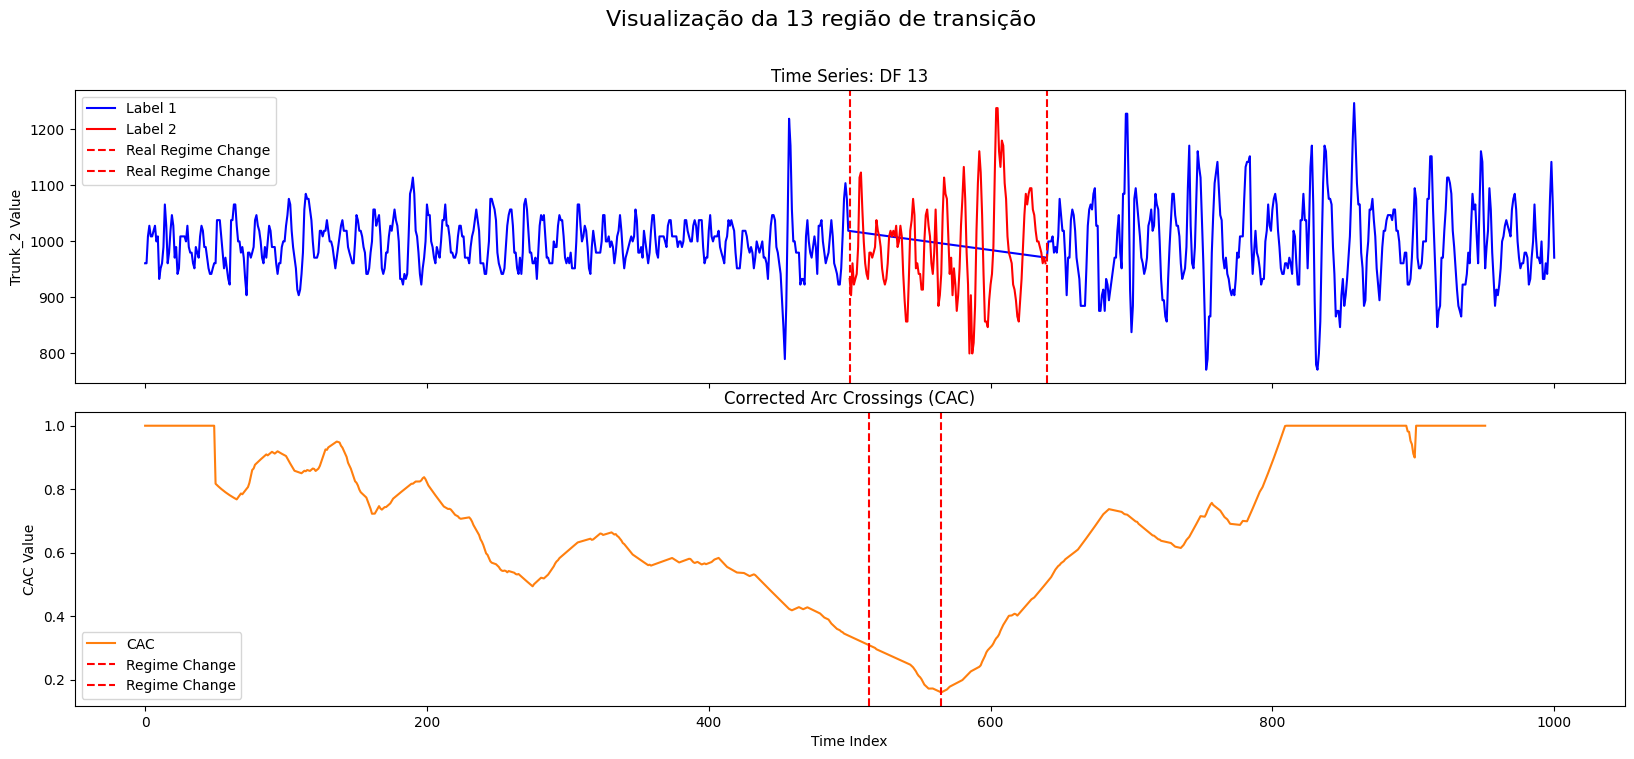

425


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


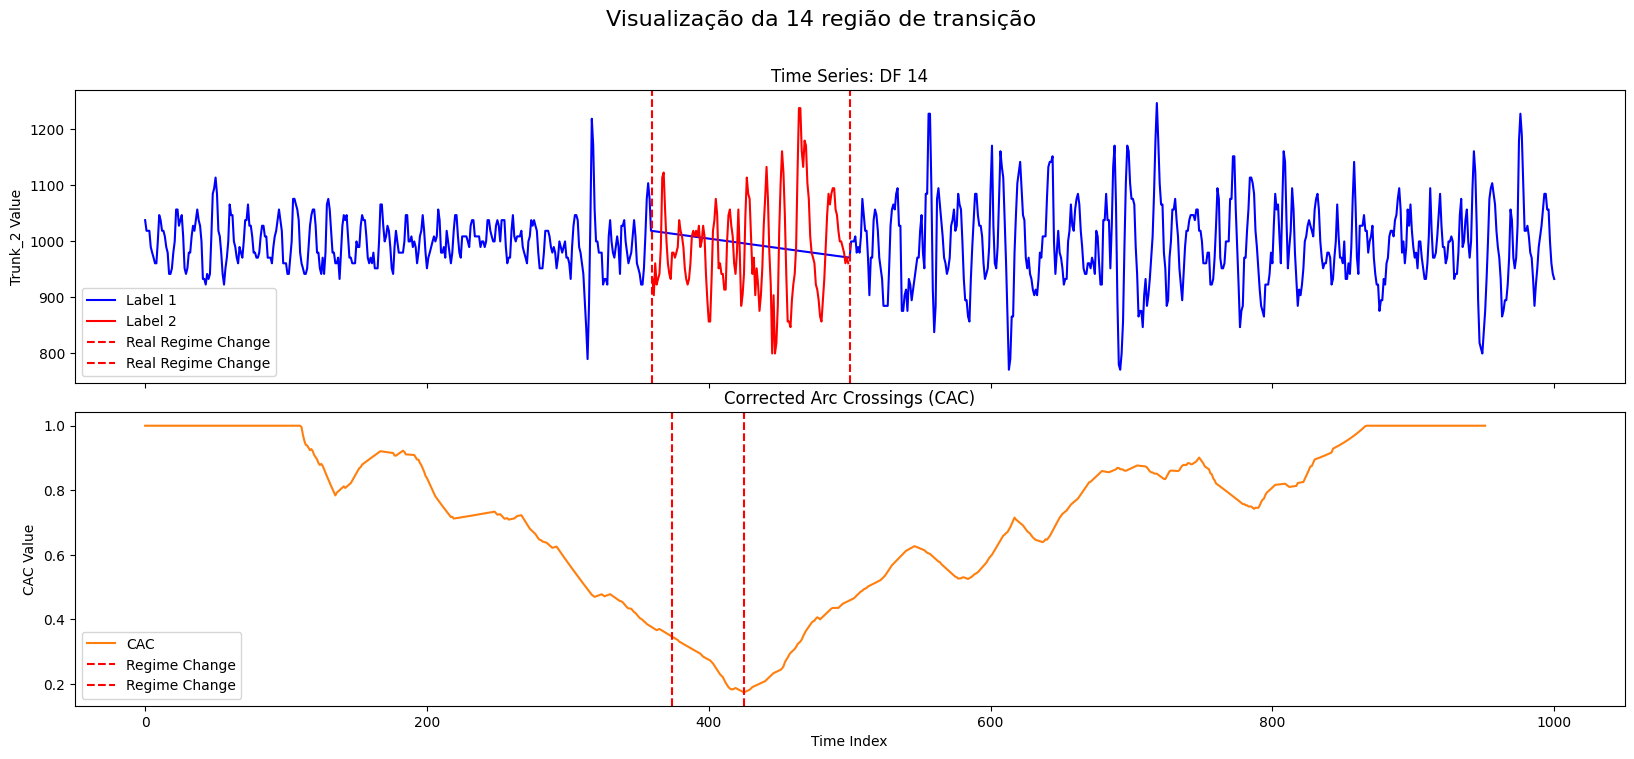

435


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


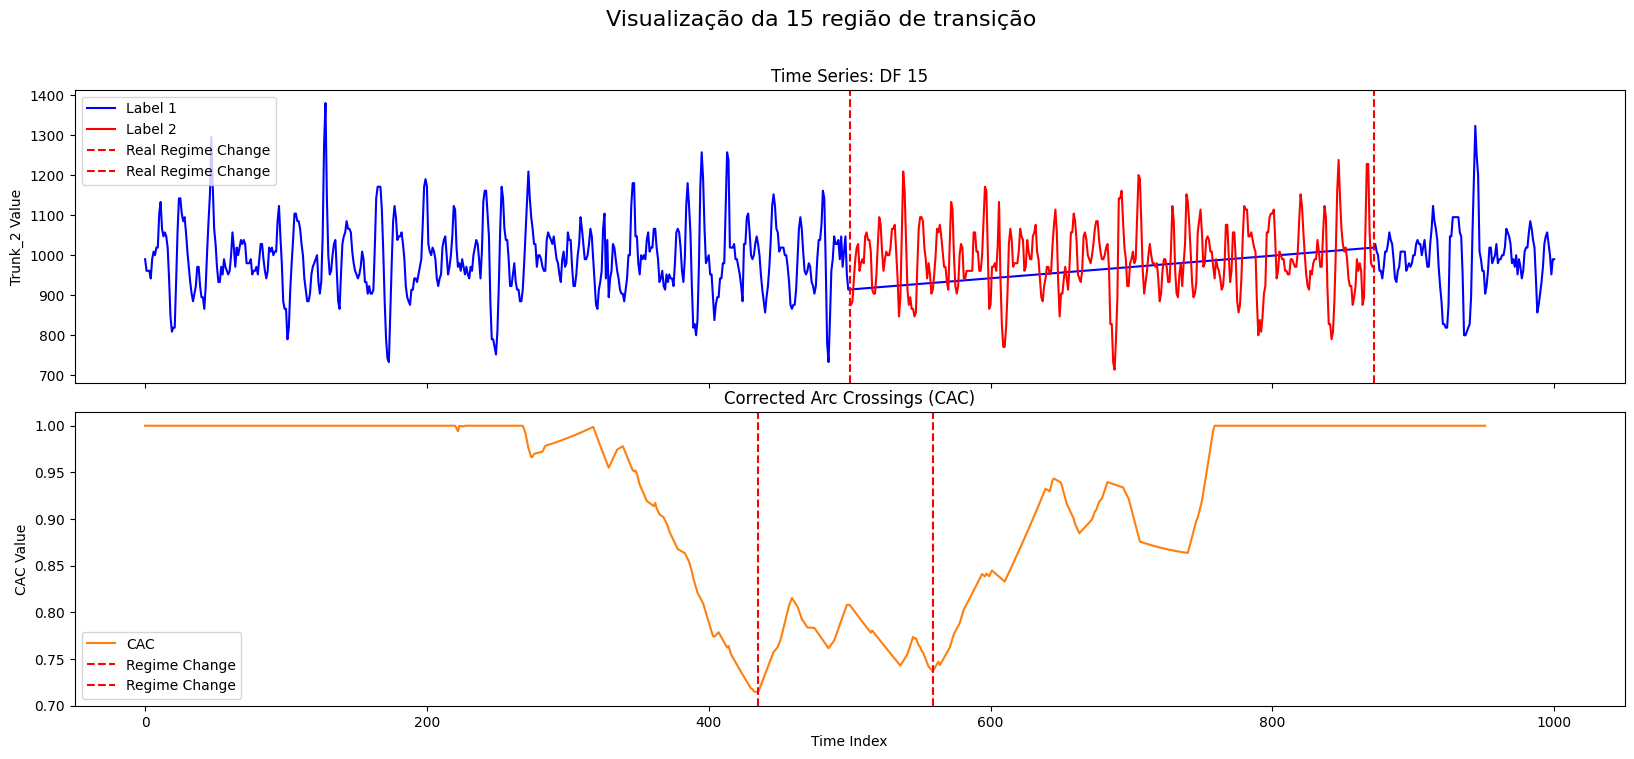

368


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


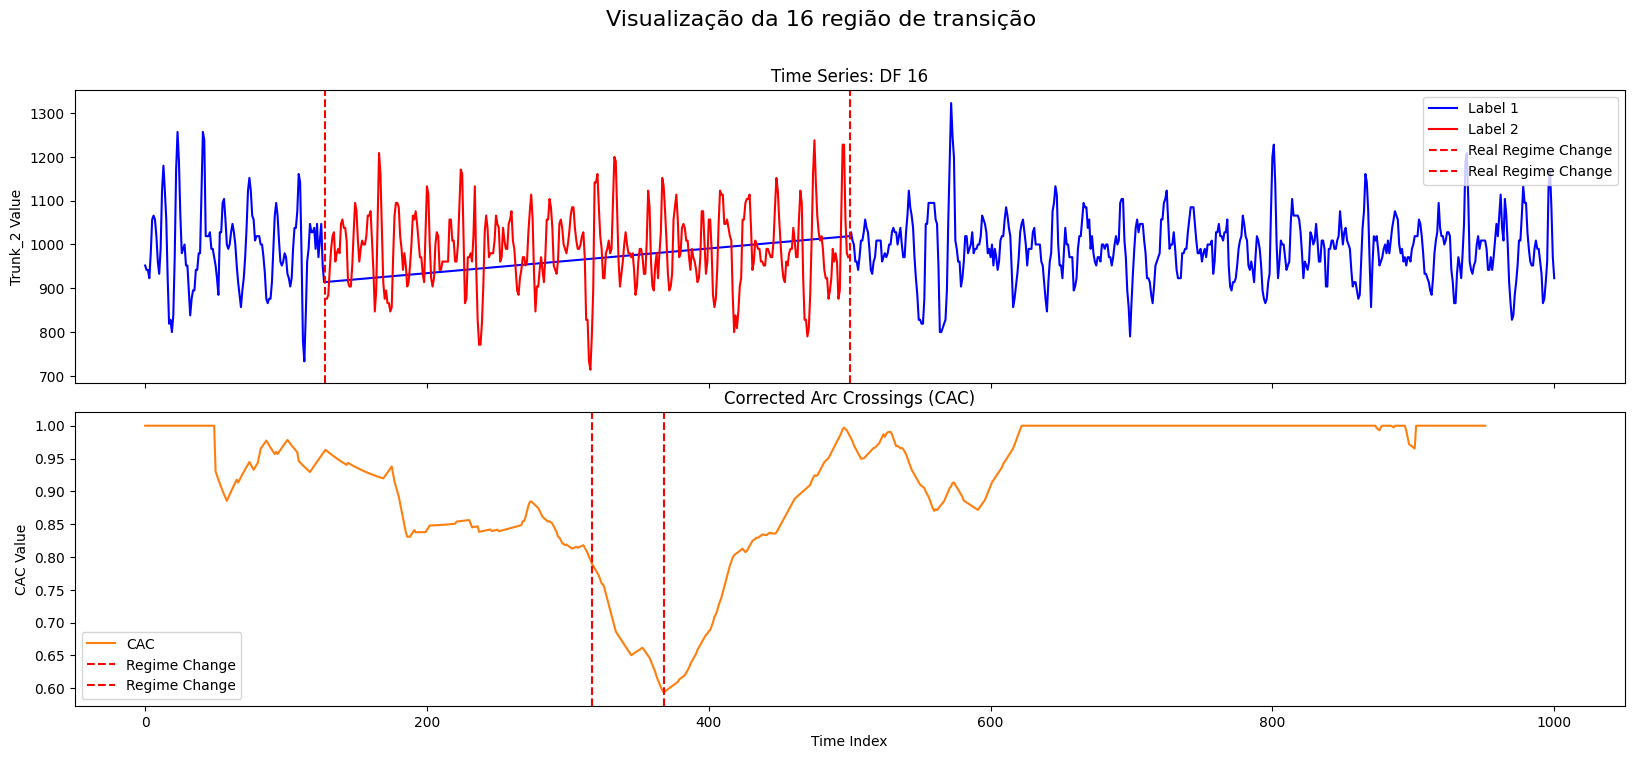

488


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


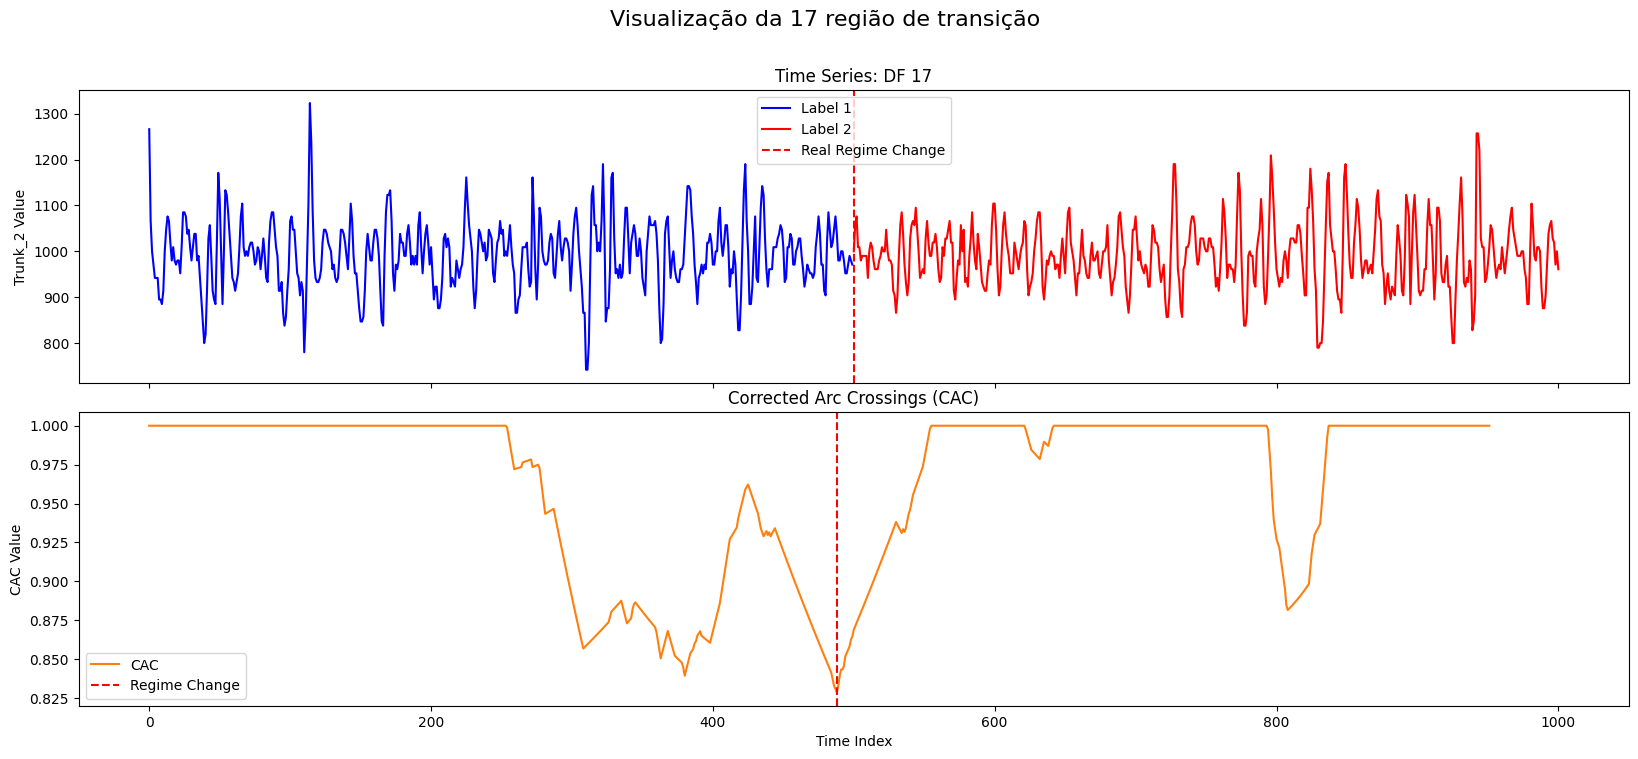

85


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


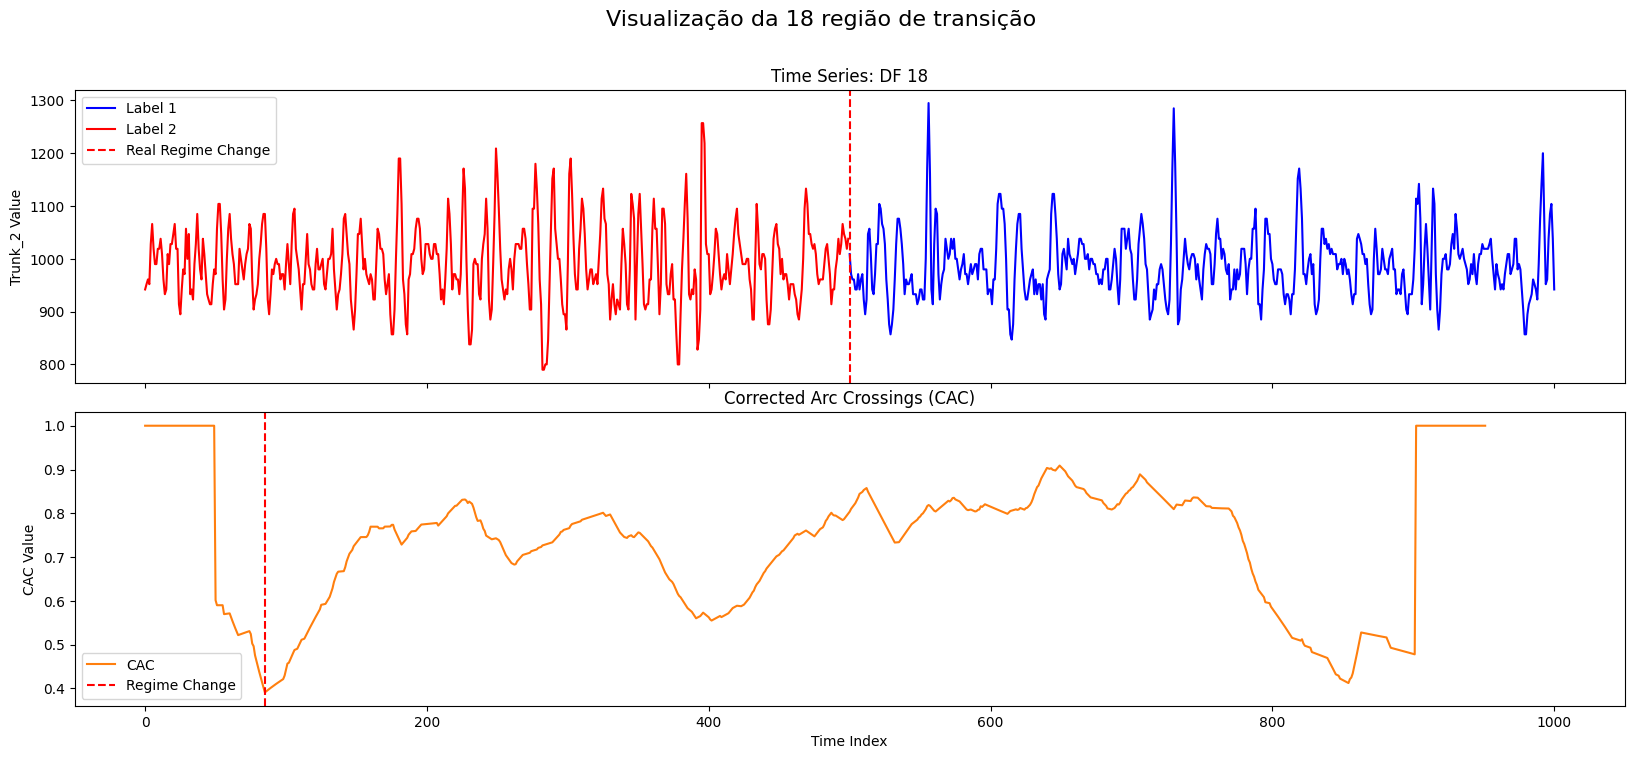

532


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


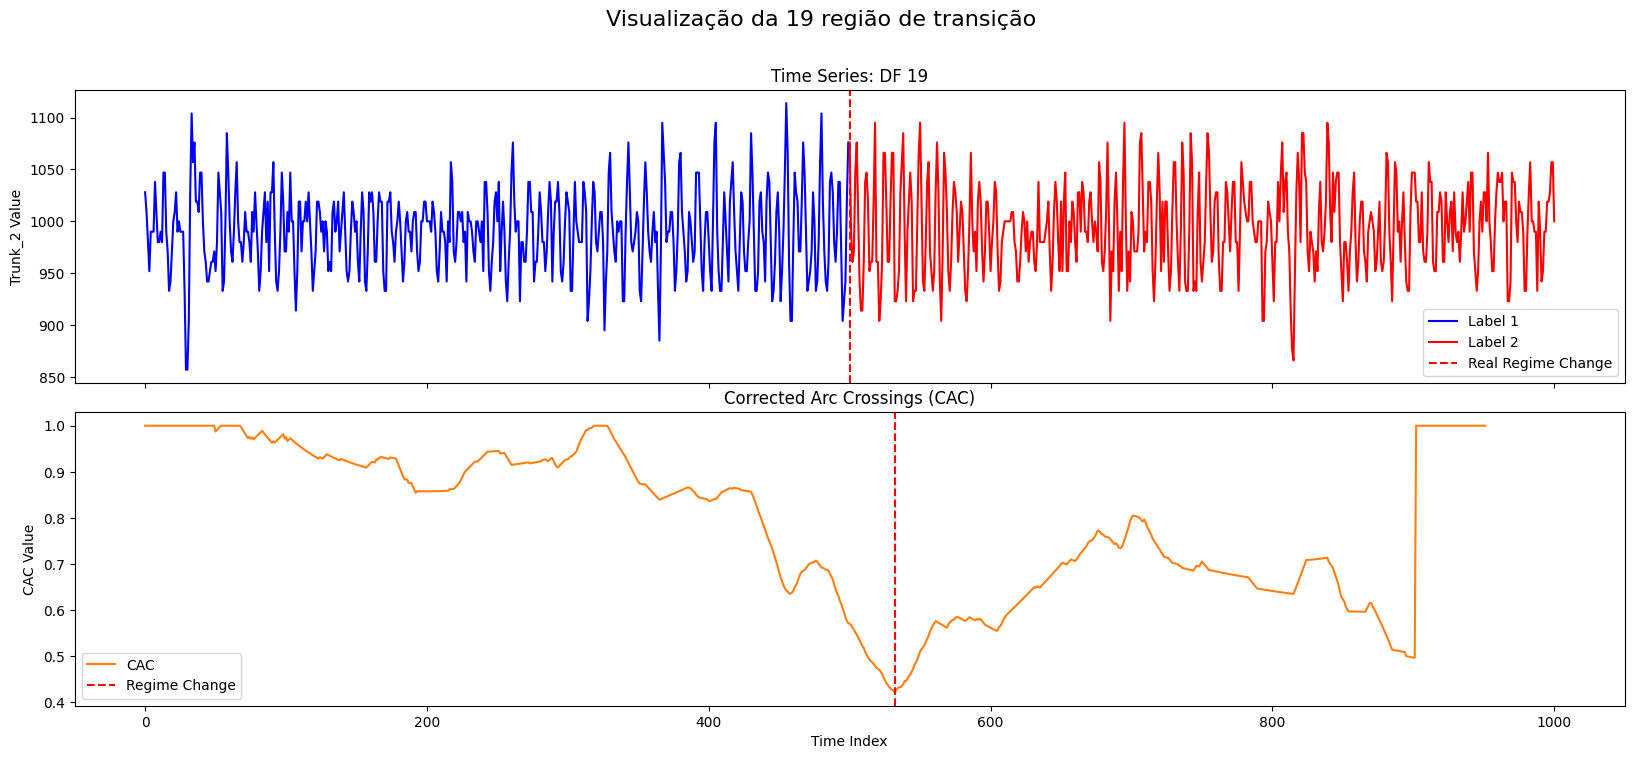

901


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


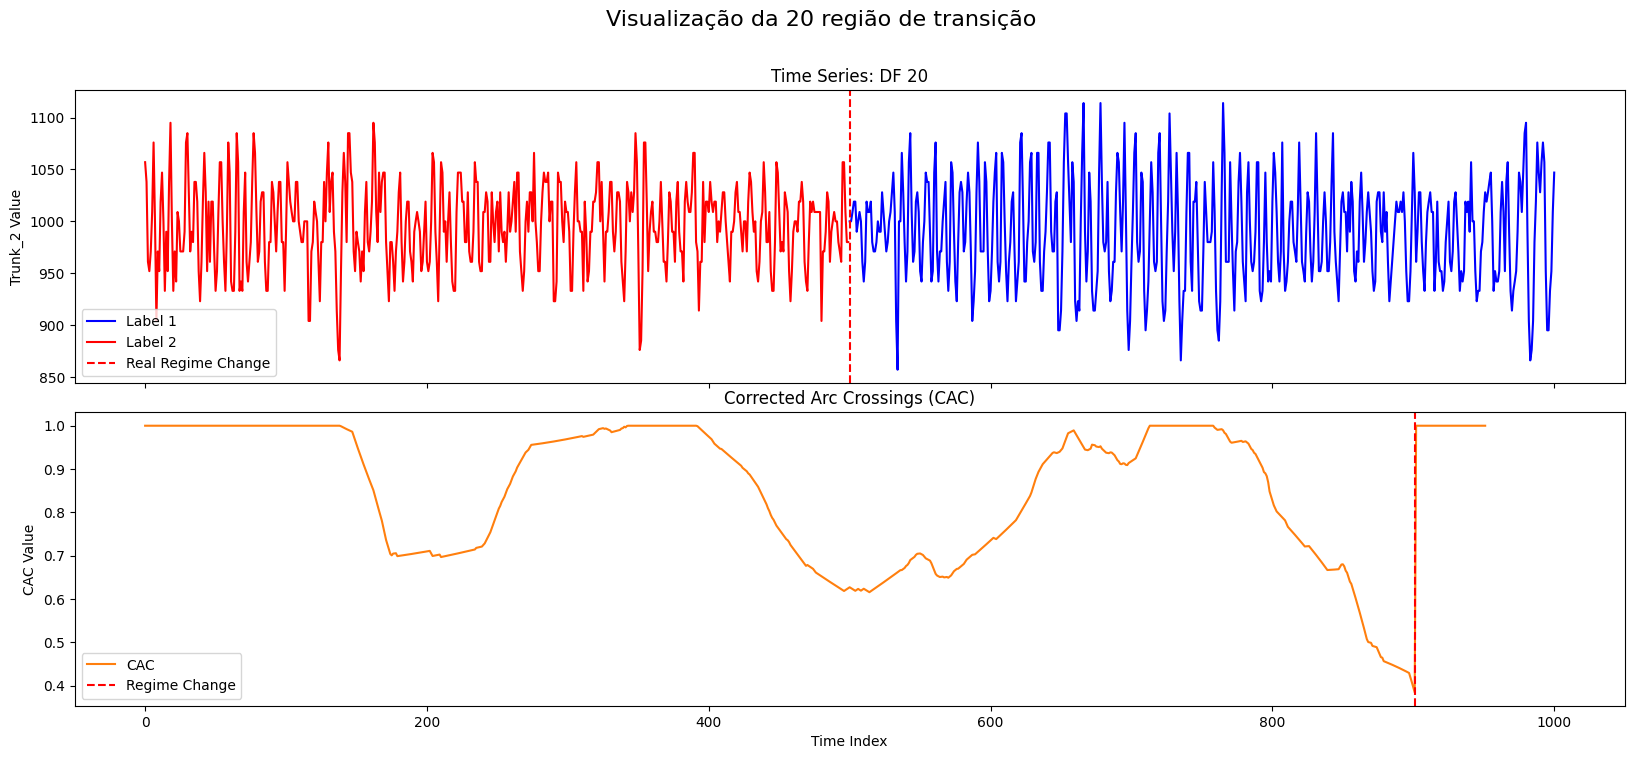

541


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


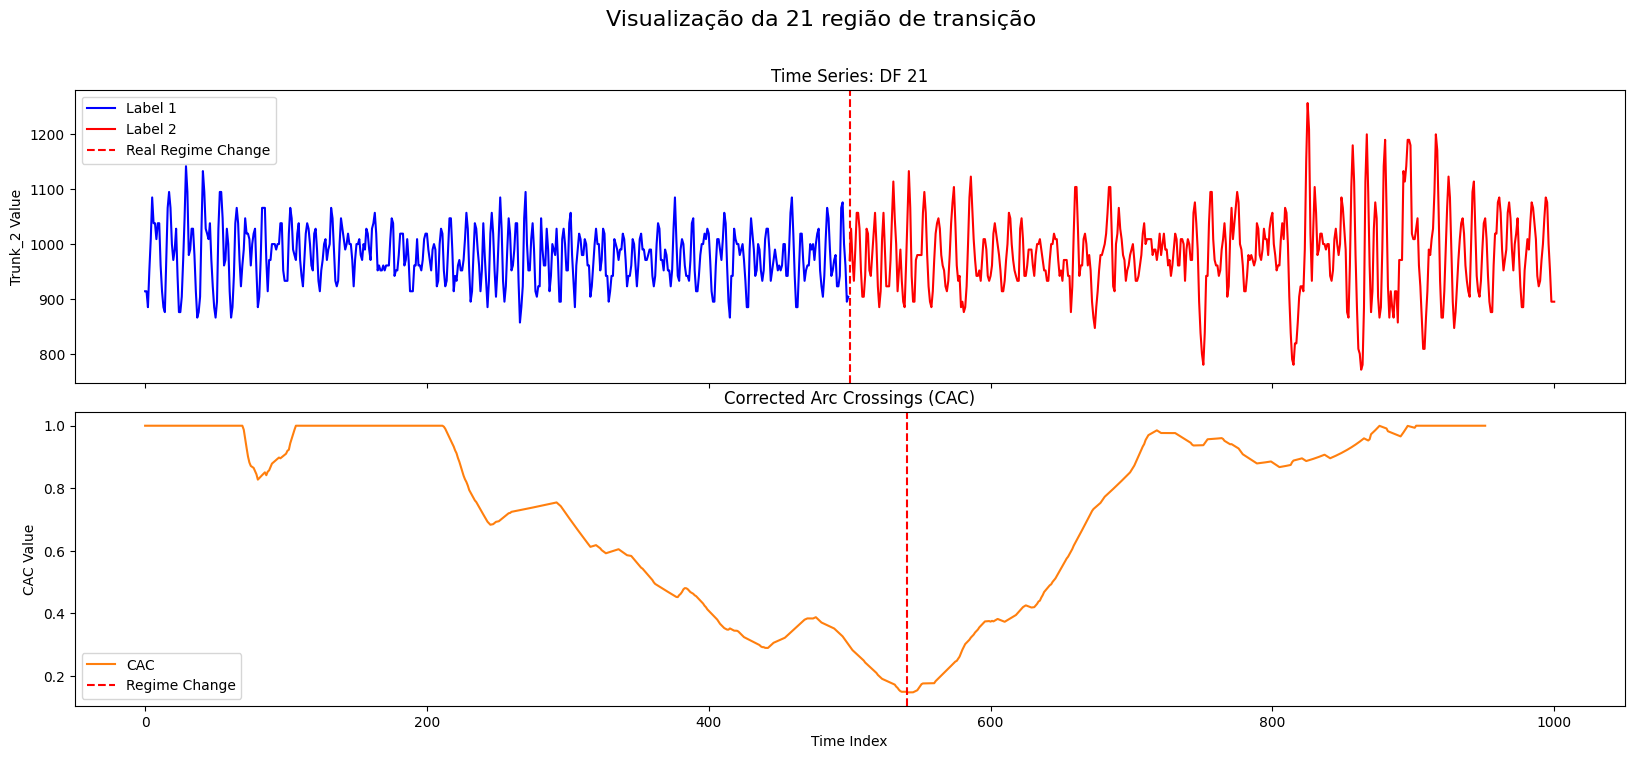

134


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


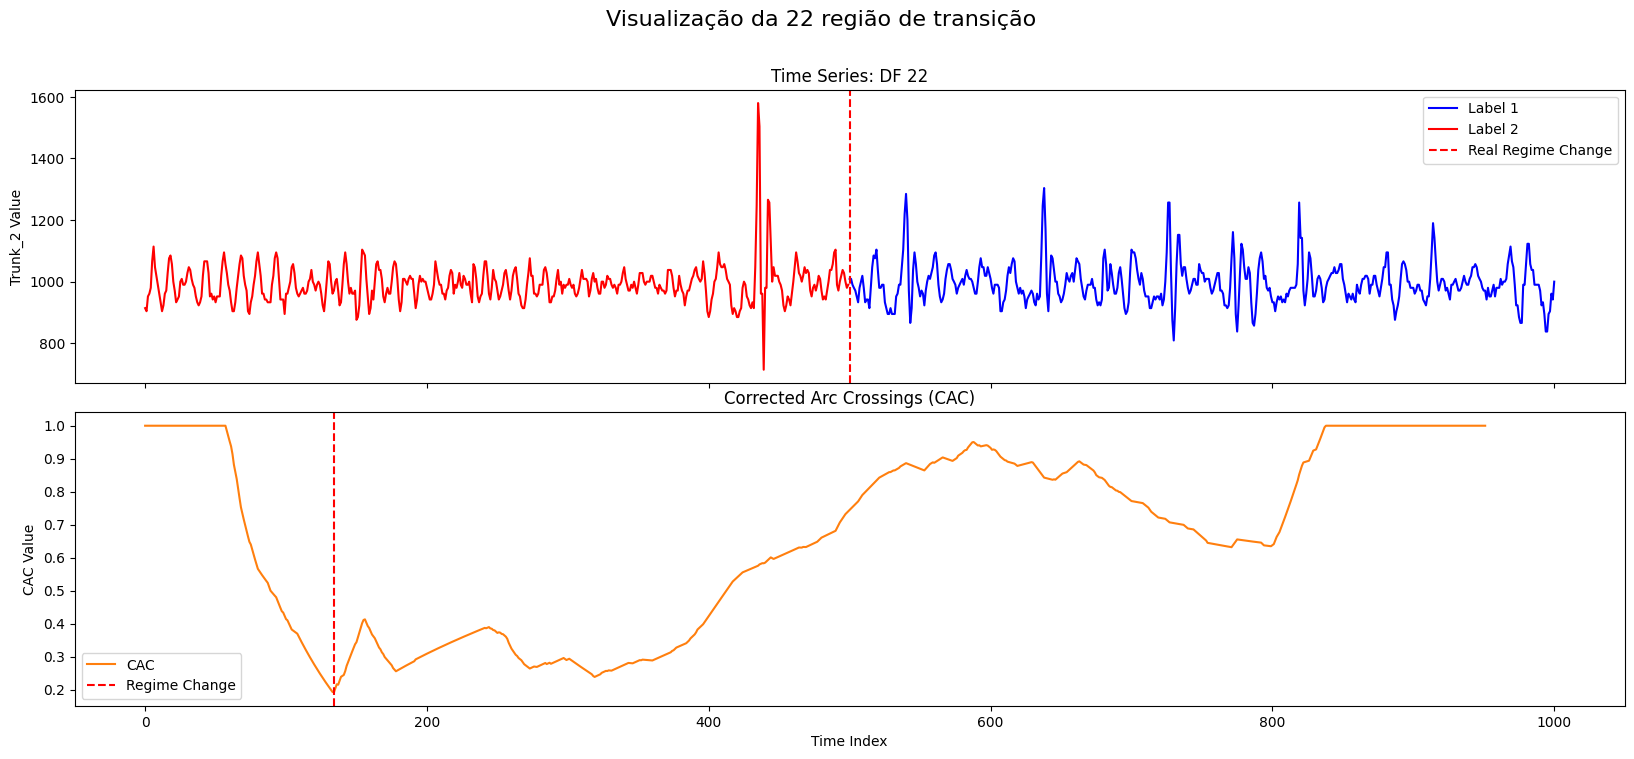

766


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


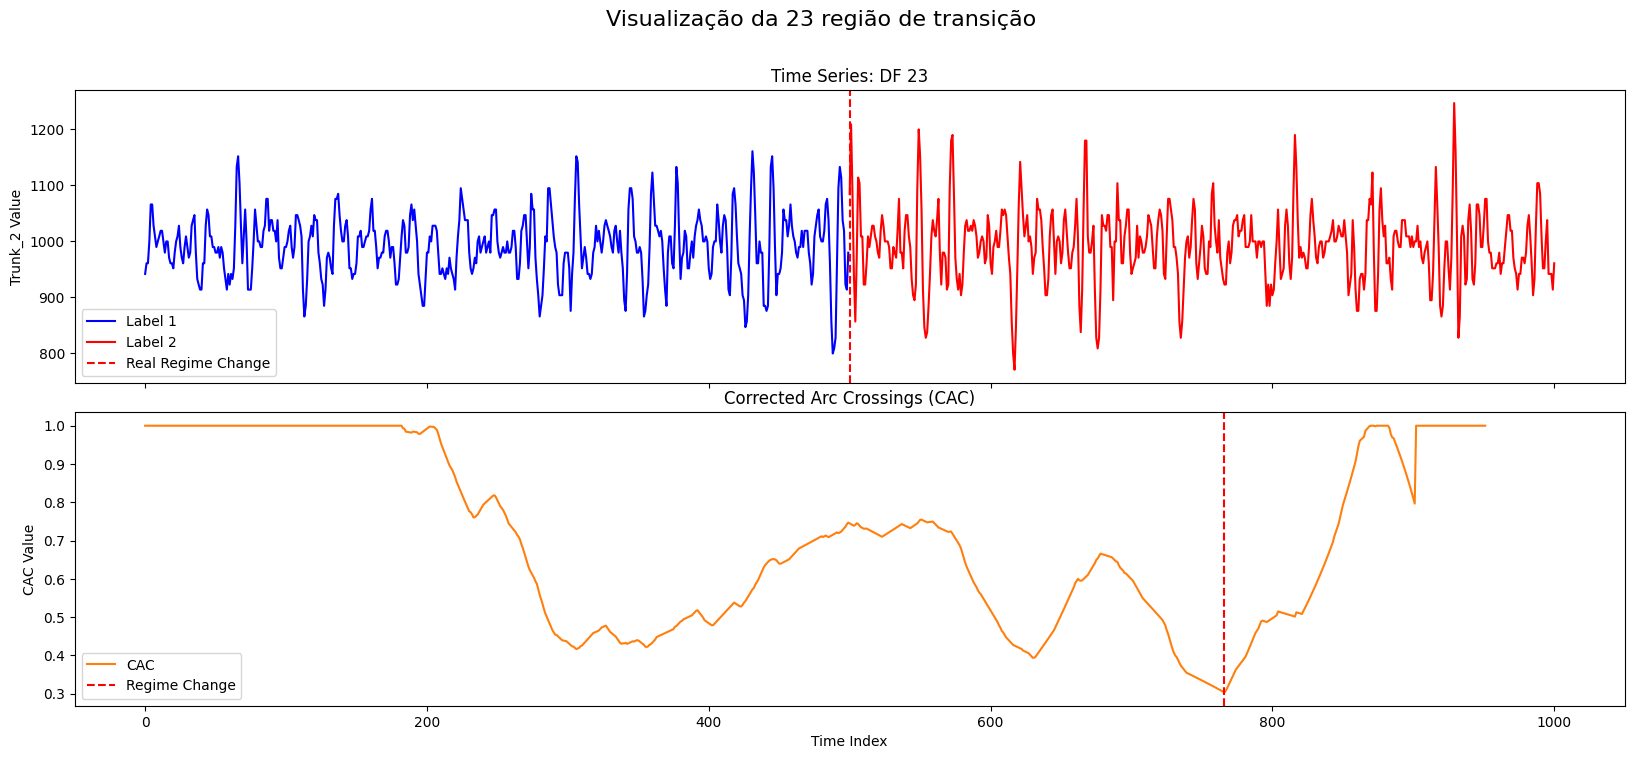

273


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


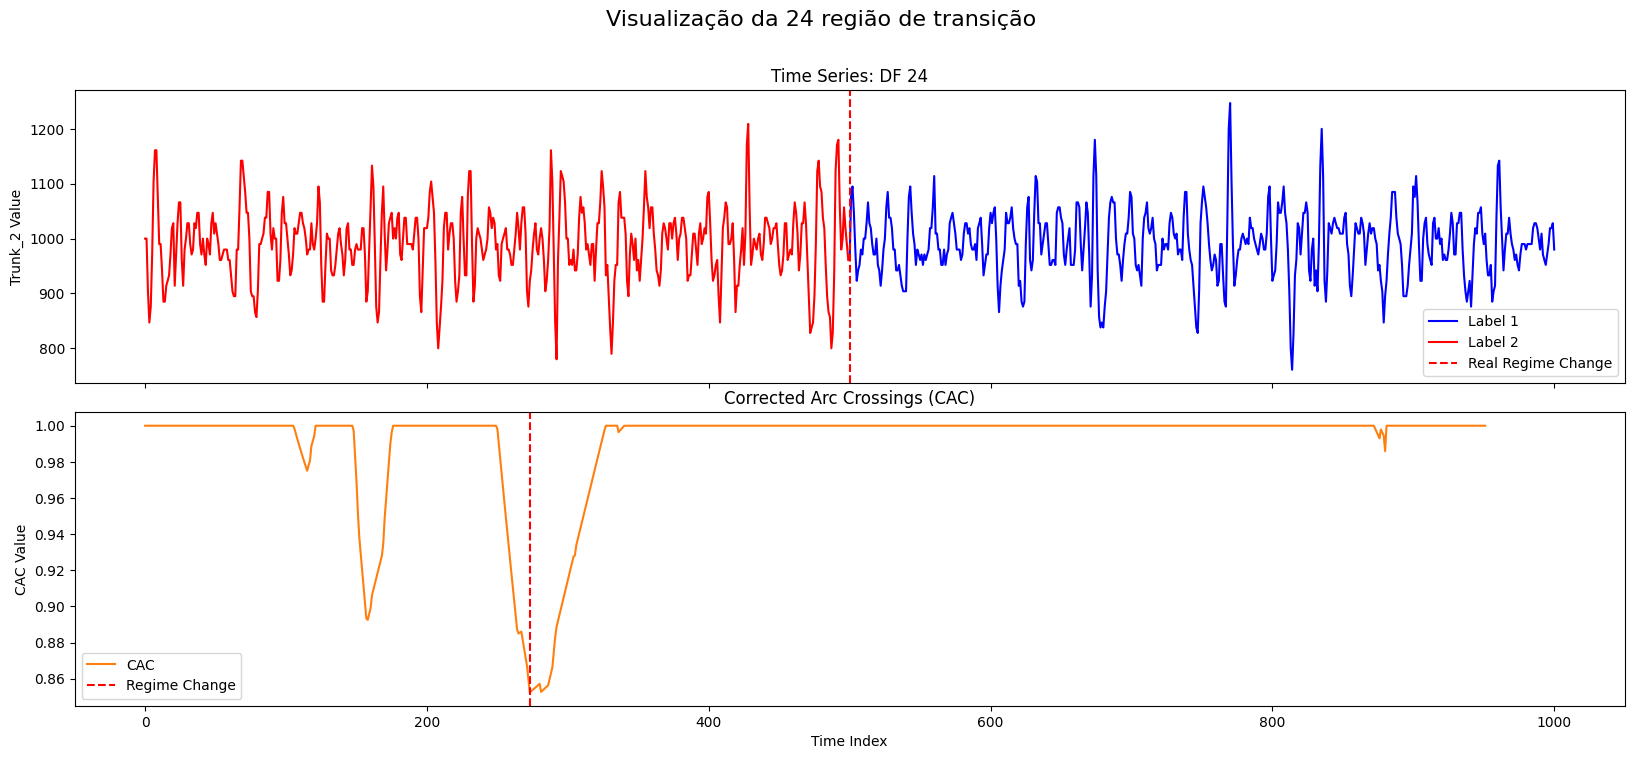

637


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


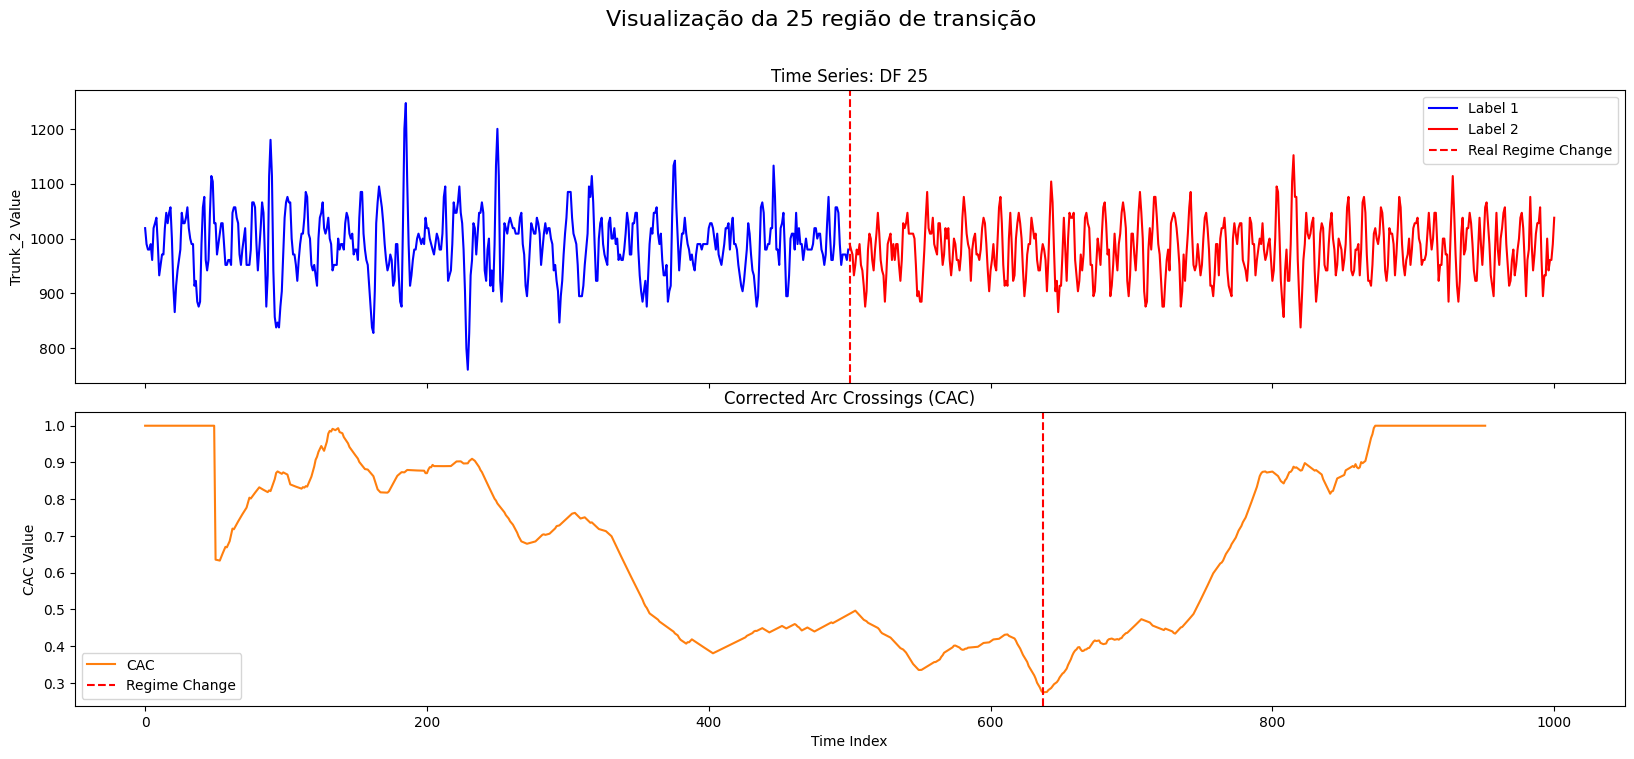

605


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


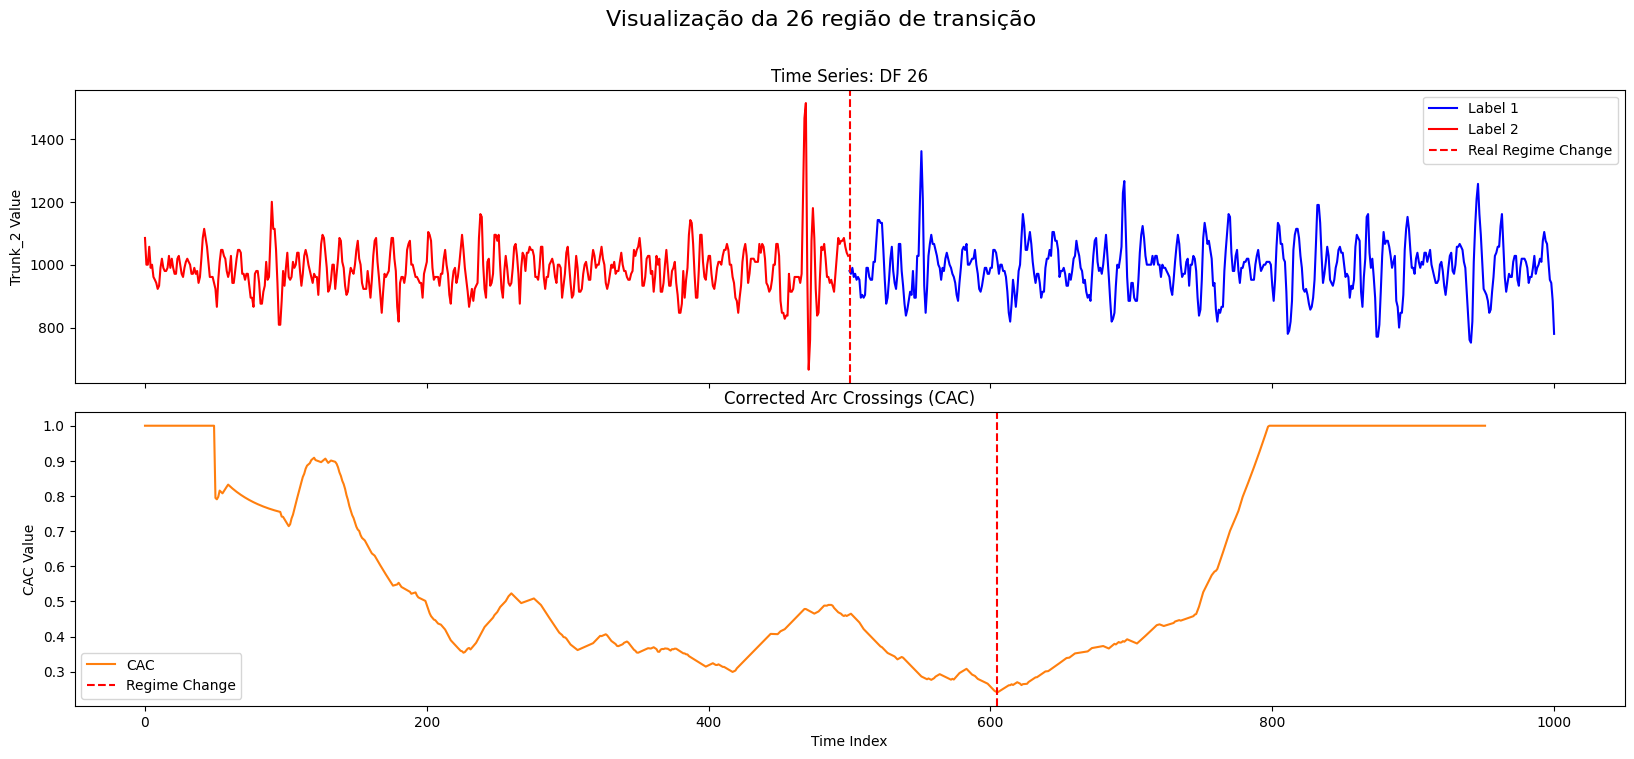

479


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


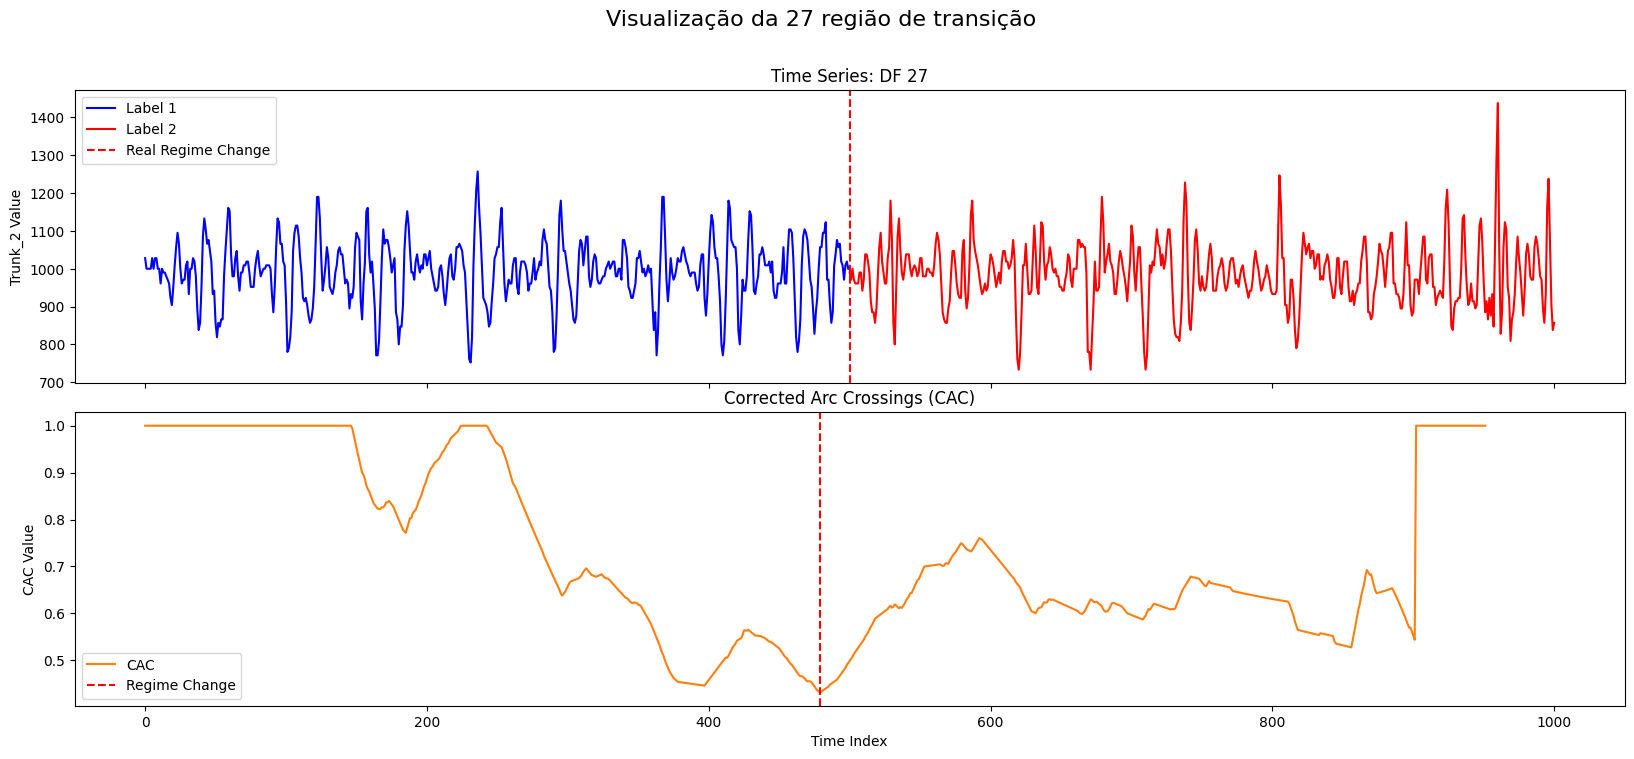

559


/tmp/ipykernel_37197/2338260015.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


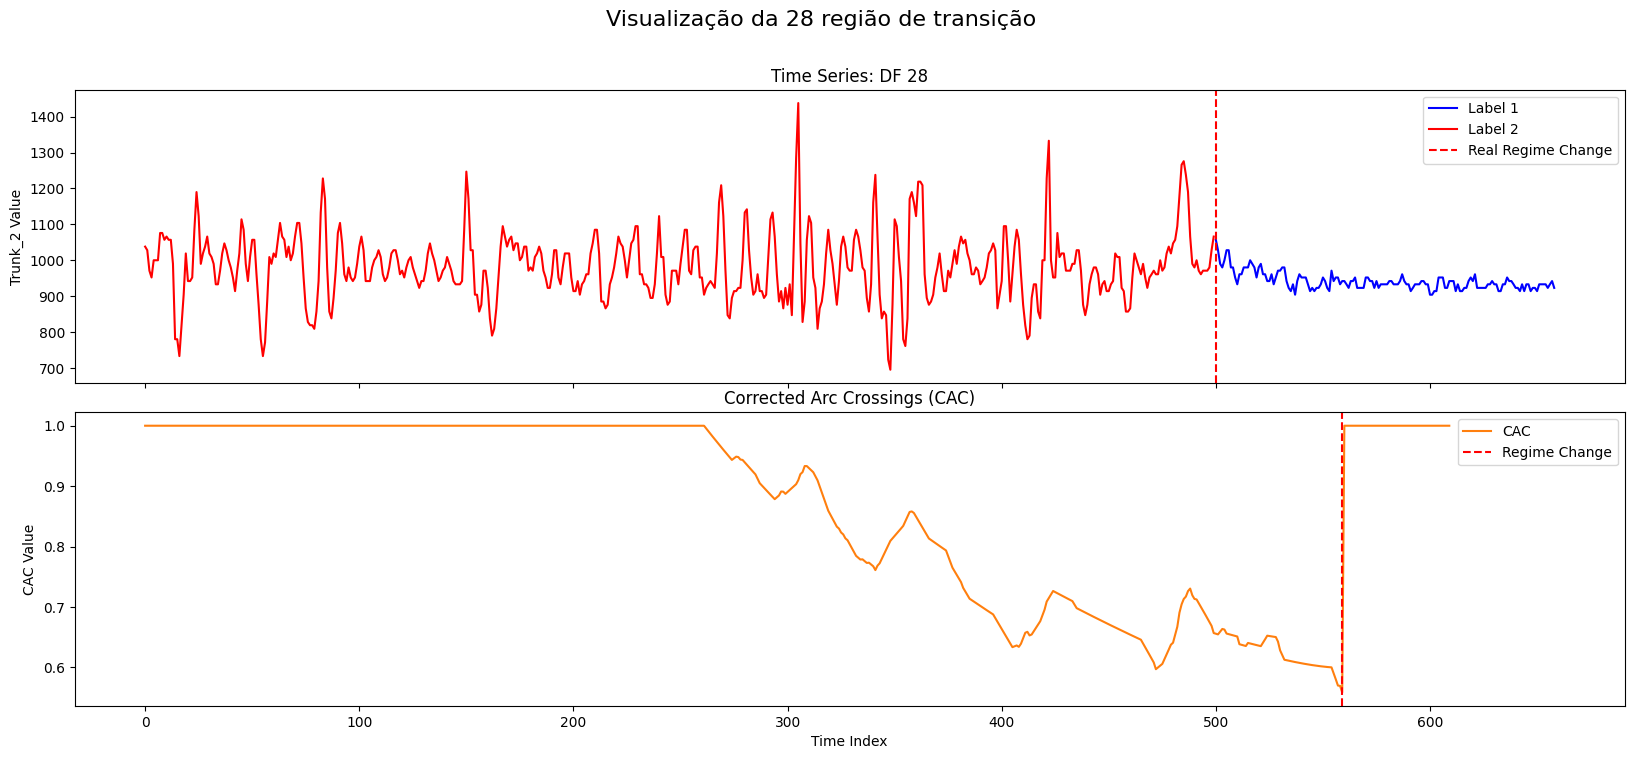

<Figure size 640x480 with 0 Axes>

In [37]:
m = 50
L = 50

# Itera pelos dataframes
error_transitions = []
for i, (df_transition) in enumerate(df_transitions_14):
    # Converte para float64
    df_transition_np = df_transition["Trunk_2"].astype(np.float64)
    
    # Cálculo do Matrix Profile e do FLUSS
    mp = stumpy.stump(df_transition_np, m=m)
    n_regimes = n_regimes_14[i]  # Número de regimes definido para cada dataframe
    cac, regime_locations = stumpy.fluss(mp[:, 1], L=L, n_regimes=n_regimes, excl_factor=1)
    
    # Criando os subplots para cada dataframe
    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0.1}, figsize=(20, 8))


    df_transition_aux = df_transition.reset_index() #-> Pode ser importante

    df_label_1_teste = df_transition_aux[df_transition_aux['status'] == 1]
    df_label_2_teste = df_transition_aux[df_transition_aux['status'] == 2]

    # Plota os dados nos eixos correspondentes
    axs[0].plot(df_label_1_teste.index, df_label_1_teste["Trunk_2"], color='blue', label='Label 1')
    axs[0].plot(df_label_2_teste.index, df_label_2_teste["Trunk_2"], color='red', label='Label 2')
    for j in range(n_regimes - 1):
        axs[0].axvline(x=index_regimes_14[i][j], linestyle="dashed", color="red", label="Real Regime Change")
    axs[0].set_ylabel("Trunk_2 Value")
    axs[0].set_title(f"Time Series: DF {i+1}")
    axs[0].legend()


    # Segundo subplot: Visualização do CAC
    axs[1].plot(range(cac.shape[0]), cac, color='C1', label='CAC')

    error_i = 0
    print(regime_locations[0])
    for j in range(n_regimes - 1):
        axs[1].axvline(x=regime_locations[j], linestyle="dashed", color="red", label="Regime Change")
        
        error_j = regime_locations[j] - index_regimes_14[i][j]
        error_j = (error_j**2)**(1/2)

        error_i = error_i + error_j

    error_i = error_i/(n_regimes - 1)

    error_transitions.append(error_i)


    axs[1].set_ylabel("CAC Value")
    axs[1].set_title("Corrected Arc Crossings (CAC)")
    axs[1].legend()

    # Título e exibição do subplot atual
    fig.suptitle(f"Visualização da {i+1} região de transição ", fontsize=16)
    plt.xlabel("Time Index")
    plt.tight_layout()
    plt.show()

# Ajusta os espaços entre os subplots principais
plt.tight_layout()

## Análise das métricas 

Dado um determinado paciente que possui \(N\) regiões de transição, para cada uma dessas regiões, podemos calcular o erro associado, \(Erro_n\), definido como:  

\begin{equation}
    Erro_n = \frac{\sum_{j=1}^{i} \left| \text{Previsto}_j - \text{Real}_j \right|}{i},
\end{equation}

onde \(j\) é o índice das transições que ocorrem dentro do n-ésimo intervalo , e \(i\) representa o número total de transições no n-ésimo intervalo.  

Com base nos valores de \(Erro_n\), podemos calcular o erro médio para uma dada série temporal como:  

\begin{equation}
    Erro_{\text{série}} = \frac{\sum_{i=1}^{N} Erro_n}{N}.
\end{equation}

In [38]:
columns = ["Ankle_1", "Ankle_2", "Ankle_3",
           "Thigh_1", "Thigh_2", "Thigh_3", 
           "Trunk_1", "Trunk_2", "Trunk_3" 
        ]

In [39]:
m = 50
L = 50

# Itera pelos dataframes e eixos
for column_analysis in columns:
    error_transitions = []
    for i, df_transition in enumerate(df_transitions_14):
        # Converte para float64
        df_transition_np = df_transition[column_analysis].astype(np.float64)
        
        # Cálculo do Matrix Profile e do FLUSS
        mp = stumpy.stump(df_transition_np, m=m)
        n_regimes = n_regimes_14[i]  # Número de regimes definido para cada dataframe
        cac, regime_locations = stumpy.fluss(mp[:, 1], L=L, n_regimes=n_regimes, excl_factor=1)
        

        # df_transition.reset_index(inplace=True) #-> Pode ser importante
        df_transition_aux = df_transition.reset_index() #-> Pode ser importante
        df_label_1_teste = df_transition_aux[df_transition_aux['status'] == 1]
        df_label_2_teste = df_transition_aux[df_transition_aux['status'] == 2]


        error_i = 0
        for j in range(n_regimes - 1):
            # axs[1].axvline(x=regime_locations[j], linestyle="dashed", color="red", label="Regime Change")
            
            error_j = regime_locations[j] - index_regimes_14[i][j]
            error_j = (error_j**2)**(1/2)

            error_i = error_i + error_j

        error_i = error_i/(n_regimes - 1)

        error_transitions.append(error_i)
    
    mean_value, std_value = np.mean(error_transitions), np.std(error_transitions)
    print(f'Column Analysis: {column_analysis}')
    print(f'Mean Value: {mean_value}, STD Value: {std_value}' )


Column Analysis: Ankle_1
Mean Value: 188.46428571428572, STD Value: 120.76371029613904
Column Analysis: Ankle_2
Mean Value: 198.67857142857142, STD Value: 143.7534604729889
Column Analysis: Ankle_3
Mean Value: 226.23214285714286, STD Value: 124.286426260276
Column Analysis: Thigh_1
Mean Value: 193.33928571428572, STD Value: 139.32445775261866
Column Analysis: Thigh_2
Mean Value: 181.33928571428572, STD Value: 129.30211394605413
Column Analysis: Thigh_3
Mean Value: 176.41071428571428, STD Value: 135.137896078904
Column Analysis: Trunk_1
Mean Value: 214.21428571428572, STD Value: 137.1782878339762
Column Analysis: Trunk_2
Mean Value: 203.66071428571428, STD Value: 137.9929510085976
Column Analysis: Trunk_3
Mean Value: 228.67857142857142, STD Value: 136.88793737199484


In [40]:
# Repetindo a análise para o Paciente 9

df_15 = df[15].reset_index(drop=True)

transitions = df_15['status'].diff()


transitions = transitions.reset_index()

transitions_values = transitions['status']
transitions_index = transitions['index']


filtered_transitions = [transitions_index[i] for i in range(len(transitions)) if transitions_values[i] != 0.0 and transitions_values[i] != np.nan]
filtered_transitions = filtered_transitions[1:]
# filtered_transitions

df_transitions_15 = []
for transition_value in filtered_transitions:
    df_aux_transitions = pd.DataFrame()
    df_aux_transitions = df_15.loc[transition_value-500:transition_value+500]

    df_transitions_15.append(df_aux_transitions)


n_regimes_15 = []
index_regimes_15 = []
for df_transition in df_transitions_15:

    transitions_aux = df_transition['status'].diff()
    transitions_aux = transitions_aux.reset_index()

    transitions_aux_values = transitions_aux['status']
    transitions_aux_index = transitions_aux.index.tolist()


    filtered_transitions_aux = [transitions_aux_index[i] for i in range(len(transitions_aux_values)) if transitions_aux_values[i] != 0.0]
    filtered_transitions_aux = filtered_transitions_aux[1:]
    
    index_regimes_15.append(filtered_transitions_aux)
    n_regimes_15.append(len(filtered_transitions_aux)+1)

m = 50
L = 50

# Itera pelos dataframes e eixos
for column_analysis in columns:
    error_transitions = []
    for i, df_transition in enumerate(df_transitions_15):
        # Converte para float64
        df_transition_np = df_transition[column_analysis].astype(np.float64)
        
        # Cálculo do Matrix Profile e do FLUSS
        mp = stumpy.stump(df_transition_np, m=m)
        n_regimes = n_regimes_15[i]  # Número de regimes definido para cada dataframe
        cac, regime_locations = stumpy.fluss(mp[:, 1], L=L, n_regimes=n_regimes, excl_factor=1)
        

        # df_transition.reset_index(inplace=True) #-> Pode ser importante
        df_transition_aux = df_transition.reset_index() #-> Pode ser importante
        df_label_1_teste = df_transition_aux[df_transition_aux['status'] == 1]
        df_label_2_teste = df_transition_aux[df_transition_aux['status'] == 2]


        error_i = 0
        for j in range(n_regimes - 1):
            # axs[1].axvline(x=regime_locations[j], linestyle="dashed", color="red", label="Regime Change")
            
            error_j = regime_locations[j] - index_regimes_15[i][j]
            error_j = (error_j**2)**(1/2)

            error_i = error_i + error_j

        error_i = error_i/(n_regimes - 1)

        error_transitions.append(error_i)
    
    mean_value, std_value = np.mean(error_transitions), np.std(error_transitions)
    print(f'Column Analysis: {column_analysis}')
    print(f'Mean Value: {mean_value}, STD Value: {std_value}' )


Column Analysis: Ankle_1
Mean Value: 211.35185185185185, STD Value: 104.37932202759802
Column Analysis: Ankle_2
Mean Value: 205.37037037037038, STD Value: 114.10647988486315
Column Analysis: Ankle_3
Mean Value: 198.50925925925927, STD Value: 114.61745919057512
Column Analysis: Thigh_1
Mean Value: 211.70679012345678, STD Value: 123.28434101662081
Column Analysis: Thigh_2
Mean Value: 214.9104938271605, STD Value: 117.0278743173858
Column Analysis: Thigh_3
Mean Value: 185.05246913580245, STD Value: 111.28454900754566
Column Analysis: Trunk_1
Mean Value: 198.52777777777777, STD Value: 105.06754514696667
Column Analysis: Trunk_2
Mean Value: 204.4814814814815, STD Value: 128.74170102569872
Column Analysis: Trunk_3
Mean Value: 213.04938271604937, STD Value: 125.21547941699218


### Conclusão

Dada a forma como segmentamos nossos dados, utilizando uma janela de 1000 pontos que pode conter mais de um ponto de transição, tanto nossa análise visual quanto a métrica proposta indicam que o FLUSS não é um método adequado para essa análise. O número de regiões de análise limita a aplicação visual e, a partir das tabelas geradas para os pacientes 8 e 9, observamos um erro elevado associado ao método.

Uma possível direção para análises futuras é avaliar o desempenho do algoritmo FLOSS (Fast Lowcost Online Semantic Segmentation) em um cenário de detecção online, em vez de utilizar o FLUSS, que é um algoritmo para análise em batch. Outra abordagem interessante é  explorar diferentes formas de segmentar os dados, como a modificação do tamanho das janelas de análise, a fim de verificar se isso pode melhorar os resultados obtidos.